<a href="https://colab.research.google.com/github/lituldust/steam-games-dataset-analysis/blob/main/Steam_Games_Dataset_2025_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Steam Games Dataset Analysis**

Source: https://www.kaggle.com/datasets/srgiomanhes/steam-games-dataset-2025
---



# Brief Analysis

There is a start-up game company, call it **XYZ Company**, that wants to try making a game and uploading it to the Steam platform. However, this is their first time making a game for the Steam platform, so they are still quite unfamiliar with how the market works on Steam. Therefore, they contacted us to ask for help in analyzing how the game market works on Steam to assist with the company's game development and release strategy.

**Note:**
* In this analysis, we consider that succesfull game is a game with high positive reviews and have so much total reviews.

# Question

From the brief before, we can assign some question about what should we analysis from this dataset. We can formulate questions that will help us capture important information/insights needed by XYZ company in the future game development process. Therefore, here are some questions we can ask to conduct the analysis process:

## Market Landscape and Genre Analysis

* What are the most common and most saturated game genres on Steam?
* Which genres receive the highest average positive review percentages?
* What is the distribution of games across different categories (e.g., 'Overwhelmingly Positive', 'Mixed')?

## Product and Feature Strategy

* Is there a correlation between the number of achievements and a game's total reviews or positive rating?
* How do different game categories (e.g., Single-player, Multi-player, Co-op, MMO) perform in terms of review scores and number of reviews?

## Pricing and Monetization Strategy

* What is the relationship between price and a game's positive review percentage?
* How do free-to-play games compare to paid games in terms of total reviews and review scores?
* Is there a correlation between price and critical acclaim (metacritic score)?

#1. Import Dataset

In [1]:
# Using kagglehub (sometimes error)
import kagglehub

# Download latest version
path = kagglehub.dataset_download("srgiomanhes/steam-games-dataset-2025")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/steam-games-dataset-2025


In [9]:
datapath = '/root/.cache/kagglehub/datasets/srgiomanhes/steam-games-dataset-2025/versions/3/steam_games.csv'

In [2]:
# Manual upload
import os
from google.colab import files

file = files.upload()

Saving steam_games.csv to steam_games (1).csv


In [3]:
datapath = '/content/steam_games.csv'

#2. Data Overview

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [5]:
import pandas as pd

df = pd.read_csv(datapath)
df.head()

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
0,2719580,勇者の伝説の勇者,['ぽけそう'],['ぽけそう'],"['Single-player', 'Family Sharing']","['Casual', 'Indie']",0,0,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.99
1,2719590,Light No Fire,['Hello Games'],['Hello Games'],"['Single-player', 'Multi-player', 'Co-op', 'On...","['Action', 'Adventure']",0,0,['windows'],False,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.00
2,2719600,Lorhaven: Cursed War,['GoldenGod Games'],['GoldenGod Games'],"['Single-player', 'Multi-player', 'PvP', 'Shar...","['RPG', 'Strategy']",0,32,"['windows', 'mac']",True,...,[],9,8,1,0.0,9 user reviews,88.9,0,False,9.99
3,2719610,PUIQ: Demons,['Giammnn'],['Giammnn'],"['Single-player', 'Steam Achievements', 'Famil...","['Action', 'Casual', 'Indie', 'RPG']",0,28,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,2.99
4,2719650,Project XSTING,['Saucy Melon'],['Saucy Melon'],"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Casual', 'Indie', 'Early Access']",0,42,['windows'],True,...,[],9,9,0,0.0,9 user reviews,100.0,0,False,7.99


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71429 entries, 0 to 71428
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   steam_appid          71429 non-null  int64  
 1   name                 71429 non-null  object 
 2   developers           71429 non-null  object 
 3   publishers           71429 non-null  object 
 4   categories           71429 non-null  object 
 5   genres               71429 non-null  object 
 6   required_age         71429 non-null  int64  
 7   n_achievements       71429 non-null  int64  
 8   platforms            71429 non-null  object 
 9   is_released          71429 non-null  bool   
 10  release_date         71429 non-null  object 
 11  additional_content   71429 non-null  object 
 12  total_reviews        71429 non-null  int64  
 13  total_positive       71429 non-null  int64  
 14  total_negative       71429 non-null  int64  
 15  review_score         71429 non-null 

In [7]:
print('Total rows: ', df.shape[0])
print('Total columns: ', df.shape[1])

Total rows:  71429
Total columns:  21


# 3. Data Preparation

## 3.1 Remove Unreleased Games

In this dataset, unreleased games have less relevant weight. To ensure that the analysis is more effective and factual, information about unreleased games will be removed.

In [8]:
df['is_released'].value_counts()

,count
is_released,
True,58041
False,13388


In [9]:
df = df[df['is_released'] == True].reset_index(drop=True)

df.head()

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
0,2719580,勇者の伝説の勇者,['ぽけそう'],['ぽけそう'],"['Single-player', 'Family Sharing']","['Casual', 'Indie']",0,0,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.99
1,2719600,Lorhaven: Cursed War,['GoldenGod Games'],['GoldenGod Games'],"['Single-player', 'Multi-player', 'PvP', 'Shar...","['RPG', 'Strategy']",0,32,"['windows', 'mac']",True,...,[],9,8,1,0.0,9 user reviews,88.9,0,False,9.99
2,2719610,PUIQ: Demons,['Giammnn'],['Giammnn'],"['Single-player', 'Steam Achievements', 'Famil...","['Action', 'Casual', 'Indie', 'RPG']",0,28,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,2.99
3,2719650,Project XSTING,['Saucy Melon'],['Saucy Melon'],"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Casual', 'Indie', 'Early Access']",0,42,['windows'],True,...,[],9,9,0,0.0,9 user reviews,100.0,0,False,7.99
4,2719710,Manor Madness,['Apericot Studio'],['Apericot Studio'],"['Single-player', 'Steam Achievements', 'HDR a...","['Action', 'Adventure', 'Indie', 'RPG', 'Simul...",0,5,"['windows', 'mac', 'linux']",True,...,[],0,0,0,0.0,No user reviews,0.0,0,True,0.00


In [10]:
print('Total rows (after drop unreleased games): ', df.shape[0])

Total rows (after drop unreleased games):  58041


## 3.2 Data Cleaning

In [11]:
print('Missing values:\n')
print(df.isna().sum())

Missing values:

steam_appid            0
name                   0
developers             0
publishers             0
categories             0
genres                 0
required_age           0
n_achievements         0
platforms              0
is_released            0
release_date           0
additional_content     0
total_reviews          0
total_positive         0
total_negative         0
review_score           0
review_score_desc      0
positive_percentual    0
metacritic             0
is_free                0
price_initial (USD)    0
dtype: int64


In [12]:
print('Duplicate values:\n')
print(df.duplicated().sum())

Duplicate values:

0


### 3.2.1 Change Datatype

In [13]:
df[['developers', 'publishers', 'genres', 'categories','platforms', 'additional_content']]

,developers,publishers,genres,categories,platforms,additional_content
0,['ぽけそう'],['ぽけそう'],"['Casual', 'Indie']","['Single-player', 'Family Sharing']",['windows'],[]
1,['GoldenGod Games'],['GoldenGod Games'],"['RPG', 'Strategy']","['Single-player', 'Multi-player', 'PvP', 'Shar...","['windows', 'mac']",[]
2,['Giammnn'],['Giammnn'],"['Action', 'Casual', 'Indie', 'RPG']","['Single-player', 'Steam Achievements', 'Famil...",['windows'],[]
3,['Saucy Melon'],['Saucy Melon'],"['Action', 'Casual', 'Indie', 'Early Access']","['Single-player', 'Steam Achievements', 'Steam...",['windows'],[]
4,['Apericot Studio'],['Apericot Studio'],"['Action', 'Adventure', 'Indie', 'RPG', 'Simul...","['Single-player', 'Steam Achievements', 'HDR a...","['windows', 'mac', 'linux']",[]
...,...,...,...,...,...,...
58036,"[""Cute Hannah's Games""]","[""Cute Hannah's Games""]","['Adventure', 'Casual', 'Indie', 'Simulation',...","['Single-player', 'Steam Achievements', 'Steam...",['windows'],[]
58037,['Super PowerUp Games'],['Super PowerUp Games'],['Simulation'],"['Single-player', 'Steam Achievements', 'Full ...",['windows'],[]
58038,['Fuzz Force'],['Fuzz Force'],"['Indie', 'RPG', 'Strategy']","['Single-player', 'Steam Achievements', 'Steam...",['windows'],[]
58039,['Knifes'],['Knifes'],"['Action', 'Casual', 'Indie', 'RPG', 'Strategy']","['Single-player', 'Steam Achievements', 'Full ...",['windows'],[]


Althought this dataset have 0 number of duplicate and missing value, it seems on this string base column it still have 0 value like empty list ([]) written in string type. To make our analyze easier, we can change the data type to list.

In [14]:
print(type(df['genres'].iloc[0]))

<class 'str'>


In [15]:
import ast

# Change the data type of genres and categories column into list so we can split it up
def parse_string_list(string_list):
    try:
        return ast.literal_eval(string_list)
    except (ValueError, SyntaxError):
        return []

df['developers'] = df['developers'].apply(parse_string_list)
df['publishers'] = df['publishers'].apply(parse_string_list)
df['genres'] = df['genres'].apply(parse_string_list)
df['categories'] = df['categories'].apply(parse_string_list)
df['platforms'] = df['platforms'].apply(parse_string_list)
df['additional_content'] = df['additional_content'].apply(parse_string_list)

In [16]:
print(type(df['genres'].iloc[0]))

<class 'list'>


### 3.2.2 Filter Dataset

In [17]:
df[df['total_reviews'] < 100].count()

,0
steam_appid,49881
name,49881
developers,49881
publishers,49881
categories,49881
genres,49881
required_age,49881
n_achievements,49881
platforms,49881
is_released,49881


It looks like there is so many games with too few reviews. To make our analysis more meaningful, we can filter the dataset with games have a total reviews at least 100.

In [18]:
filtered_games = df[df['total_reviews'] >=100]

<Axes: >

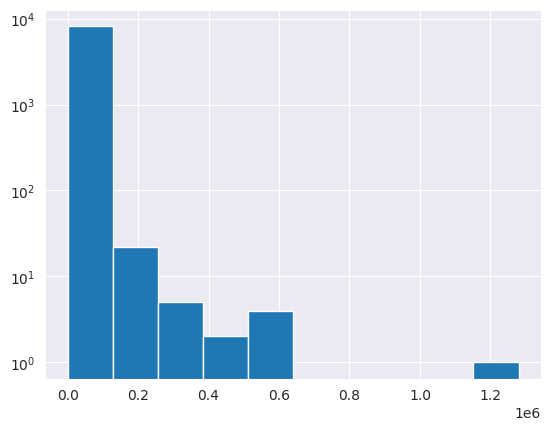

In [19]:
filtered_games['total_reviews'].hist(bins=10, log=True)

<Axes: xlabel='total_reviews'>

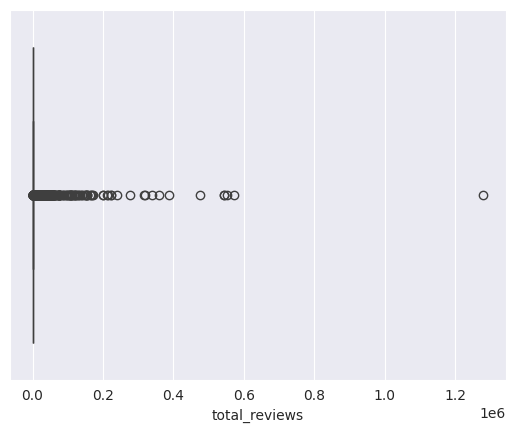

In [20]:
sns.boxplot(x = filtered_games['total_reviews'])

It seems like there is some game that have huge amount of reviews. This can be an outliers but for more accurate analysis, instead of disclude this outliers we can consider this outlier as a succesfull game.

In [21]:
bins = [0, 599, 3499, 5999, float('inf')]
labels = ['not popular', 'recognizable', 'moderate', 'high popularity']
filtered_games['Review_Category'] = pd.cut(filtered_games['total_reviews'], bins=bins, labels=labels, right=True)

bins = [0, 10, 30, 60, float('inf')]
labels = ['Cheap', 'Moderate', 'Costly', 'Very costly']
filtered_games['price_category'] = pd.cut(filtered_games['price_initial (USD)'], bins=bins, labels=labels, right=True)

/tmp/ipython-input-2013684739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_games['Review_Category'] = pd.cut(filtered_games['total_reviews'], bins=bins, labels=labels, right=True)
/tmp/ipython-input-2013684739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_games['price_category'] = pd.cut(filtered_games['price_initial (USD)'], bins=bins, labels=labels, right=True)


In [22]:
filtered_games.head()

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),Review_Category,price_category
24,2719290,Night Raider,[Tsukuyomi],[Tsukuyomi],"[Single-player, Family Sharing]","[Adventure, Indie]",0,61,[windows],True,...,157,19,8.0,Very Positive,89.2,0,False,5.99,not popular,Cheap
52,2717880,The Rogue Prince of Persia,[Evil Empire],[Ubisoft],"[Single-player, Steam Achievements, Full contr...","[Action, Adventure, Early Access]",0,49,[windows],True,...,490,77,8.0,Very Positive,86.4,0,False,19.99,not popular,Moderate
56,2717080,Merry XMerge,[PiHoEntertainment],[Yin Games],"[Single-player, Steam Cloud, Remote Play Toget...","[Casual, Indie, Strategy]",0,0,[windows],True,...,510,12,9.0,Overwhelmingly Positive,97.7,0,False,0.99,not popular,Cheap
63,2717260,I'm counting to 6...,[EMIKA_GAMES],[EMIKA_GAMES],"[Single-player, Steam Achievements, Partial Co...","[Adventure, Indie, Simulation]",0,6,[windows],True,...,129,28,8.0,Very Positive,82.2,0,False,6.99,not popular,Cheap
83,2716110,[Chilla's Art] Jisatsu | 自撮,[Chilla's Art],[Chilla's Art],"[Single-player, Steam Achievements, Family Sha...",[Indie],0,9,[windows],True,...,154,33,8.0,Very Positive,82.4,0,False,5.99,not popular,Cheap


In [23]:
filtered_games.isna().sum()

,0
steam_appid,0
name,0
developers,0
publishers,0
categories,0
genres,0
required_age,0
n_achievements,0
platforms,0
is_released,0


In [24]:
# Check the null values in price_category
filtered_games[filtered_games['price_category'].isna()]

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),Review_Category,price_category
5675,1028570,Lofi Ping Pong,[Calvares],[Kalvarez A. Party],"[Single-player, Multi-player, Shared/Split Scr...",[Indie],0,5,[windows],True,...,353,65,8.0,Very Positive,84.4,0,True,0.0,not popular,NaN
6535,998930,Seek Girl,[DSGame],[DSGame],"[Single-player, Steam Achievements, Steam Trad...","[Action, Casual, Indie]",0,160,[windows],True,...,322,79,8.0,Very Positive,80.3,0,True,0.0,not popular,NaN
7897,946660,Loria,[Loria],[Loria],[Single-player],[Strategy],0,0,"[windows, mac, linux]",True,...,85,19,8.0,Very Positive,81.7,0,True,0.0,not popular,NaN
7941,945460,Zombie Builder Defense,[Noham Games],[Noham Games],"[Single-player, Multi-player, PvP, Online PvP,...",[Action],0,9,[windows],True,...,107,18,8.0,Very Positive,85.6,0,True,0.0,not popular,NaN
8100,939510,Pandemic Express - Zombie Escape,"[TALLBOYS, tinyBuild]",[tinyBuild],"[Multi-player, PvP, Online PvP]","[Action, Indie, Massively Multiplayer]",0,27,[windows],True,...,602,390,5.0,Mixed,60.7,0,True,0.0,recognizable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57336,1407200,World of Tanks,[Wargaming Group Limited],[Wargaming Group Limited],"[Multi-player, MMO, PvP, Online PvP, Steam Ach...","[Action, Massively Multiplayer, Simulation, Fr...",80,59,[windows],True,...,135,24,8.0,Very Positive,84.9,80,True,0.0,not popular,NaN
57345,1409160,Plasma,"[Dry Cactus, Licorice ehf]",[Dry Licorice],"[Single-player, Steam Workshop]","[Indie, Simulation, Free To Play]",0,0,[windows],True,...,266,41,8.0,Very Positive,86.6,0,True,0.0,not popular,NaN
57395,1416260,SpellForce 3 Versus Edition,[Grimlore Games],[THQ Nordic],"[Multi-player, PvP, Online PvP, LAN PvP, Co-op...","[RPG, Strategy, Free To Play]",0,0,[windows],True,...,181,36,8.0,Very Positive,83.4,0,True,0.0,not popular,NaN
57487,1904540,Football Manager 2023,[Sports Interactive],[SEGA],"[Single-player, Multi-player, Steam Achievemen...","[Simulation, Sports]",0,100,"[windows, mac]",True,...,4940,601,8.0,Very Positive,89.2,0,False,0.0,moderate,NaN


In [25]:
# Fill the null values in price_category as cheap because it is a free games
filtered_games['price_category'].fillna('Cheap', inplace=True)

/tmp/ipython-input-2359259889.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_games['price_category'].fillna('Cheap', inplace=True)
/tmp/ipython-input-2359259889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_games['price_category'].fillna('Cheap', inplace=True)


In [26]:
filtered_games.head()

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),Review_Category,price_category
24,2719290,Night Raider,[Tsukuyomi],[Tsukuyomi],"[Single-player, Family Sharing]","[Adventure, Indie]",0,61,[windows],True,...,157,19,8.0,Very Positive,89.2,0,False,5.99,not popular,Cheap
52,2717880,The Rogue Prince of Persia,[Evil Empire],[Ubisoft],"[Single-player, Steam Achievements, Full contr...","[Action, Adventure, Early Access]",0,49,[windows],True,...,490,77,8.0,Very Positive,86.4,0,False,19.99,not popular,Moderate
56,2717080,Merry XMerge,[PiHoEntertainment],[Yin Games],"[Single-player, Steam Cloud, Remote Play Toget...","[Casual, Indie, Strategy]",0,0,[windows],True,...,510,12,9.0,Overwhelmingly Positive,97.7,0,False,0.99,not popular,Cheap
63,2717260,I'm counting to 6...,[EMIKA_GAMES],[EMIKA_GAMES],"[Single-player, Steam Achievements, Partial Co...","[Adventure, Indie, Simulation]",0,6,[windows],True,...,129,28,8.0,Very Positive,82.2,0,False,6.99,not popular,Cheap
83,2716110,[Chilla's Art] Jisatsu | 自撮,[Chilla's Art],[Chilla's Art],"[Single-player, Steam Achievements, Family Sha...",[Indie],0,9,[windows],True,...,154,33,8.0,Very Positive,82.4,0,False,5.99,not popular,Cheap


After filtering this dataset, we were ready to analyze.

# 4. Exploratory Data Analysis - EDA

## 4.1 Market Landscape and Genre Analysis

In [27]:
genres_df = filtered_games.explode('genres')

In [28]:
genres = pd.DataFrame(genres_df['genres'].value_counts())
genres

,count
genres,
Indie,5351
Action,3694
Adventure,3499
Simulation,2183
Casual,2088
RPG,1959
Strategy,1861
Early Access,709
Sports,327


### 4.1.1 Most Common and Saturated Genres

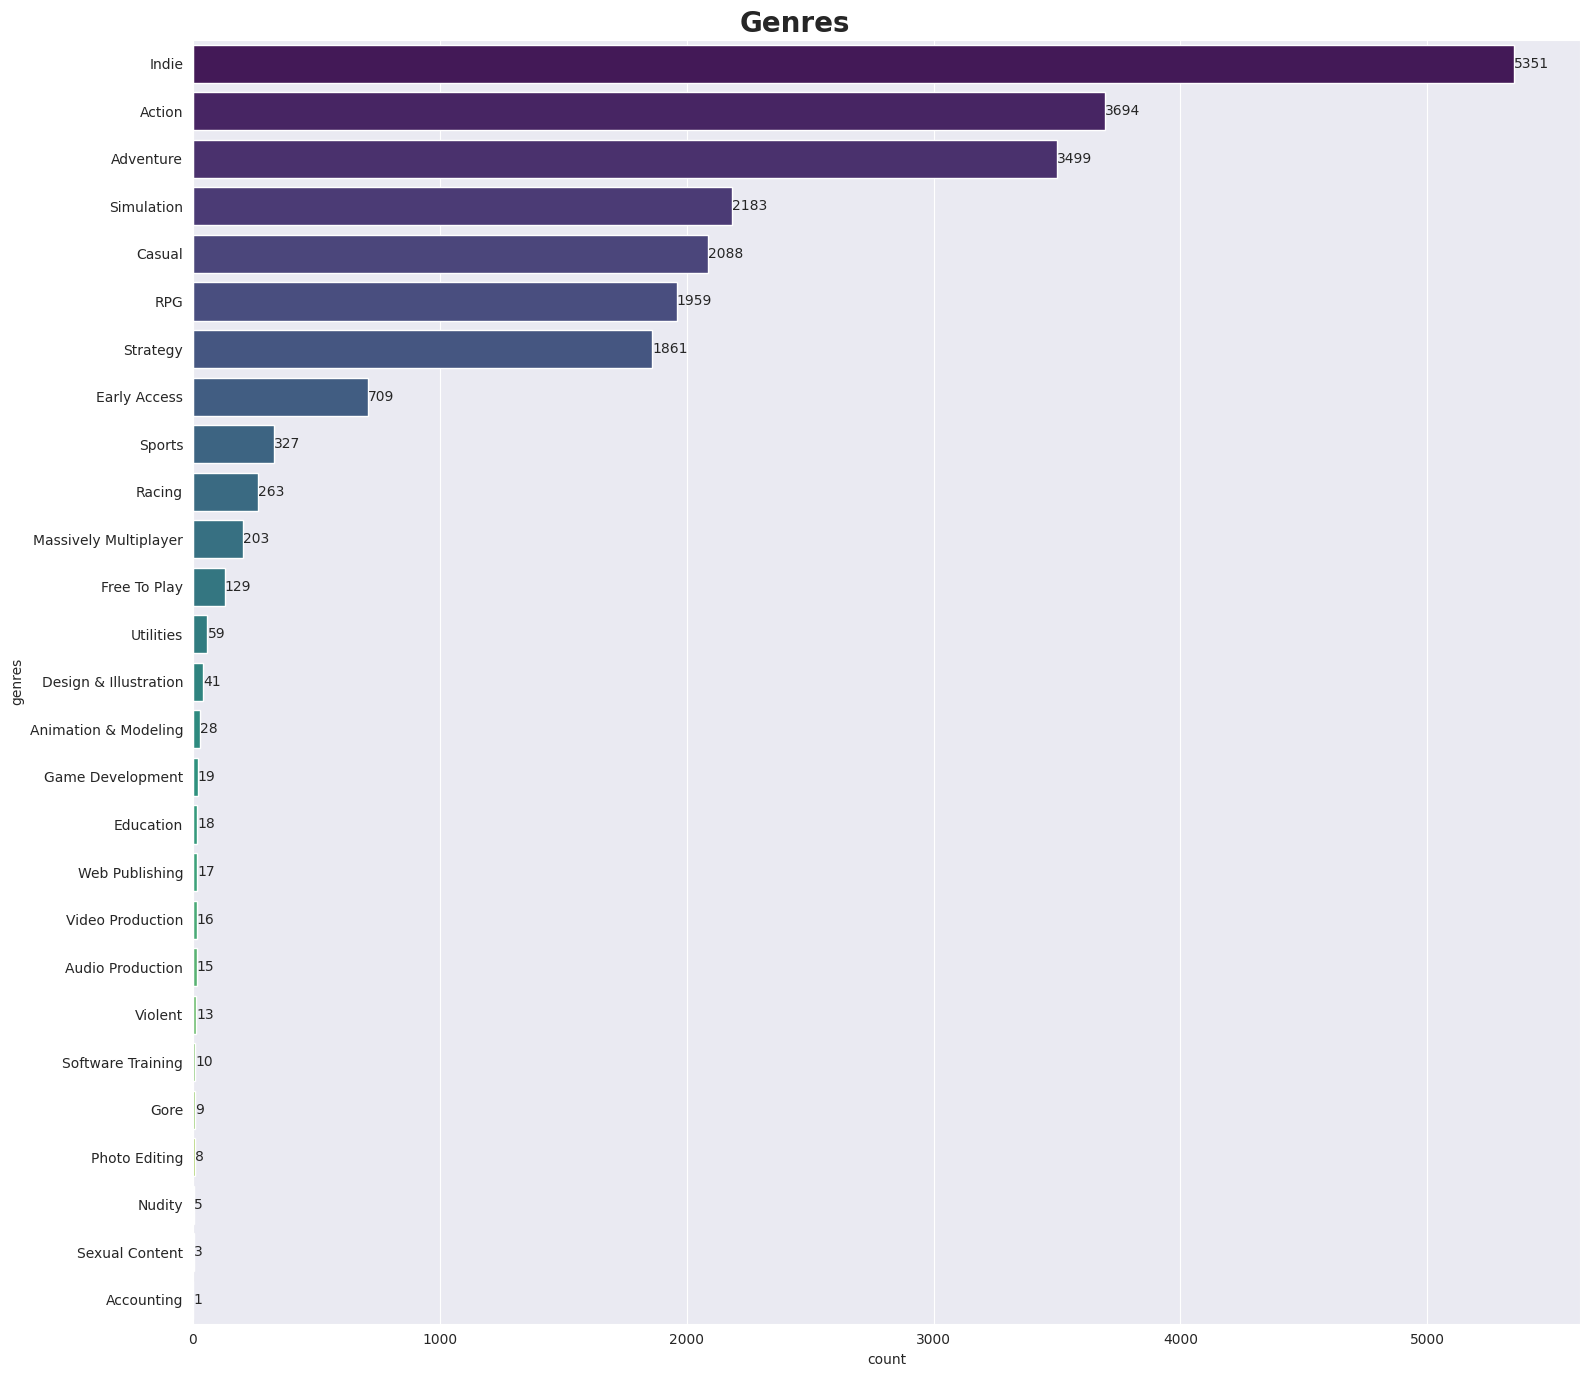

In [29]:
fig, ax = plt.subplots(figsize=(16,14))

sns.barplot(genres, x='count', y='genres', hue='genres', legend=False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container)

fig.suptitle('Genres', fontsize=20, fontweight=700)

plt.tight_layout()
plt.show()

In [30]:
genres2 = pd.DataFrame(genres_df.groupby('genres')['total_reviews'].sum().reset_index())

In [31]:
genres2.sort_values('total_reviews', ascending=False)

,genres,total_reviews
1,Action,18564399
12,Indie,13365296
2,Adventure,12016936
16,RPG,8392690
19,Simulation,6606364
22,Strategy,5226254
5,Casual,3550627
7,Early Access,2315407
13,Massively Multiplayer,2100133
9,Free To Play,1778777


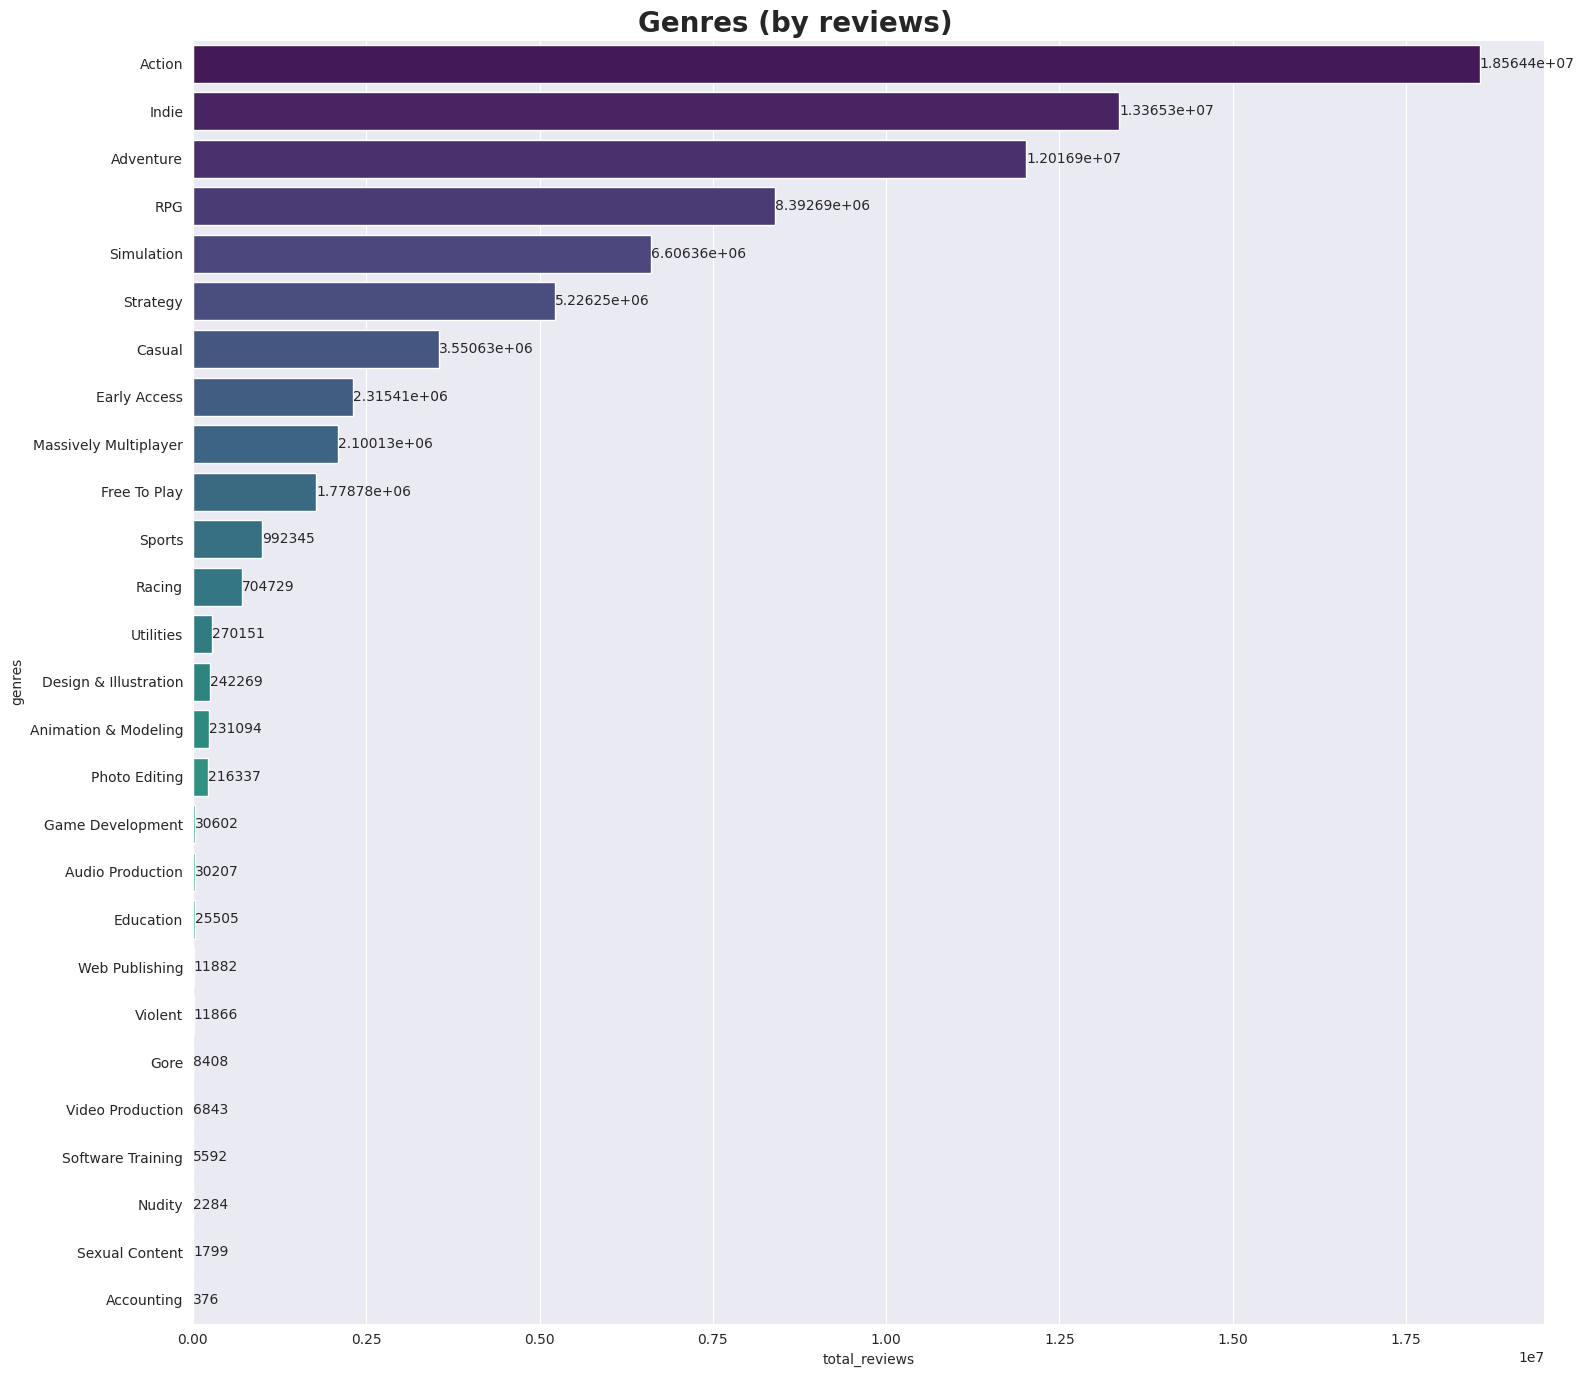

In [32]:
fig, ax = plt.subplots(figsize=(16,14))

sns.barplot(genres2.sort_values('total_reviews', ascending=False), x='total_reviews', y='genres', hue='genres', legend=False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container)

fig.suptitle('Genres (by reviews)', fontsize=20, fontweight=700)

plt.tight_layout()
plt.show()

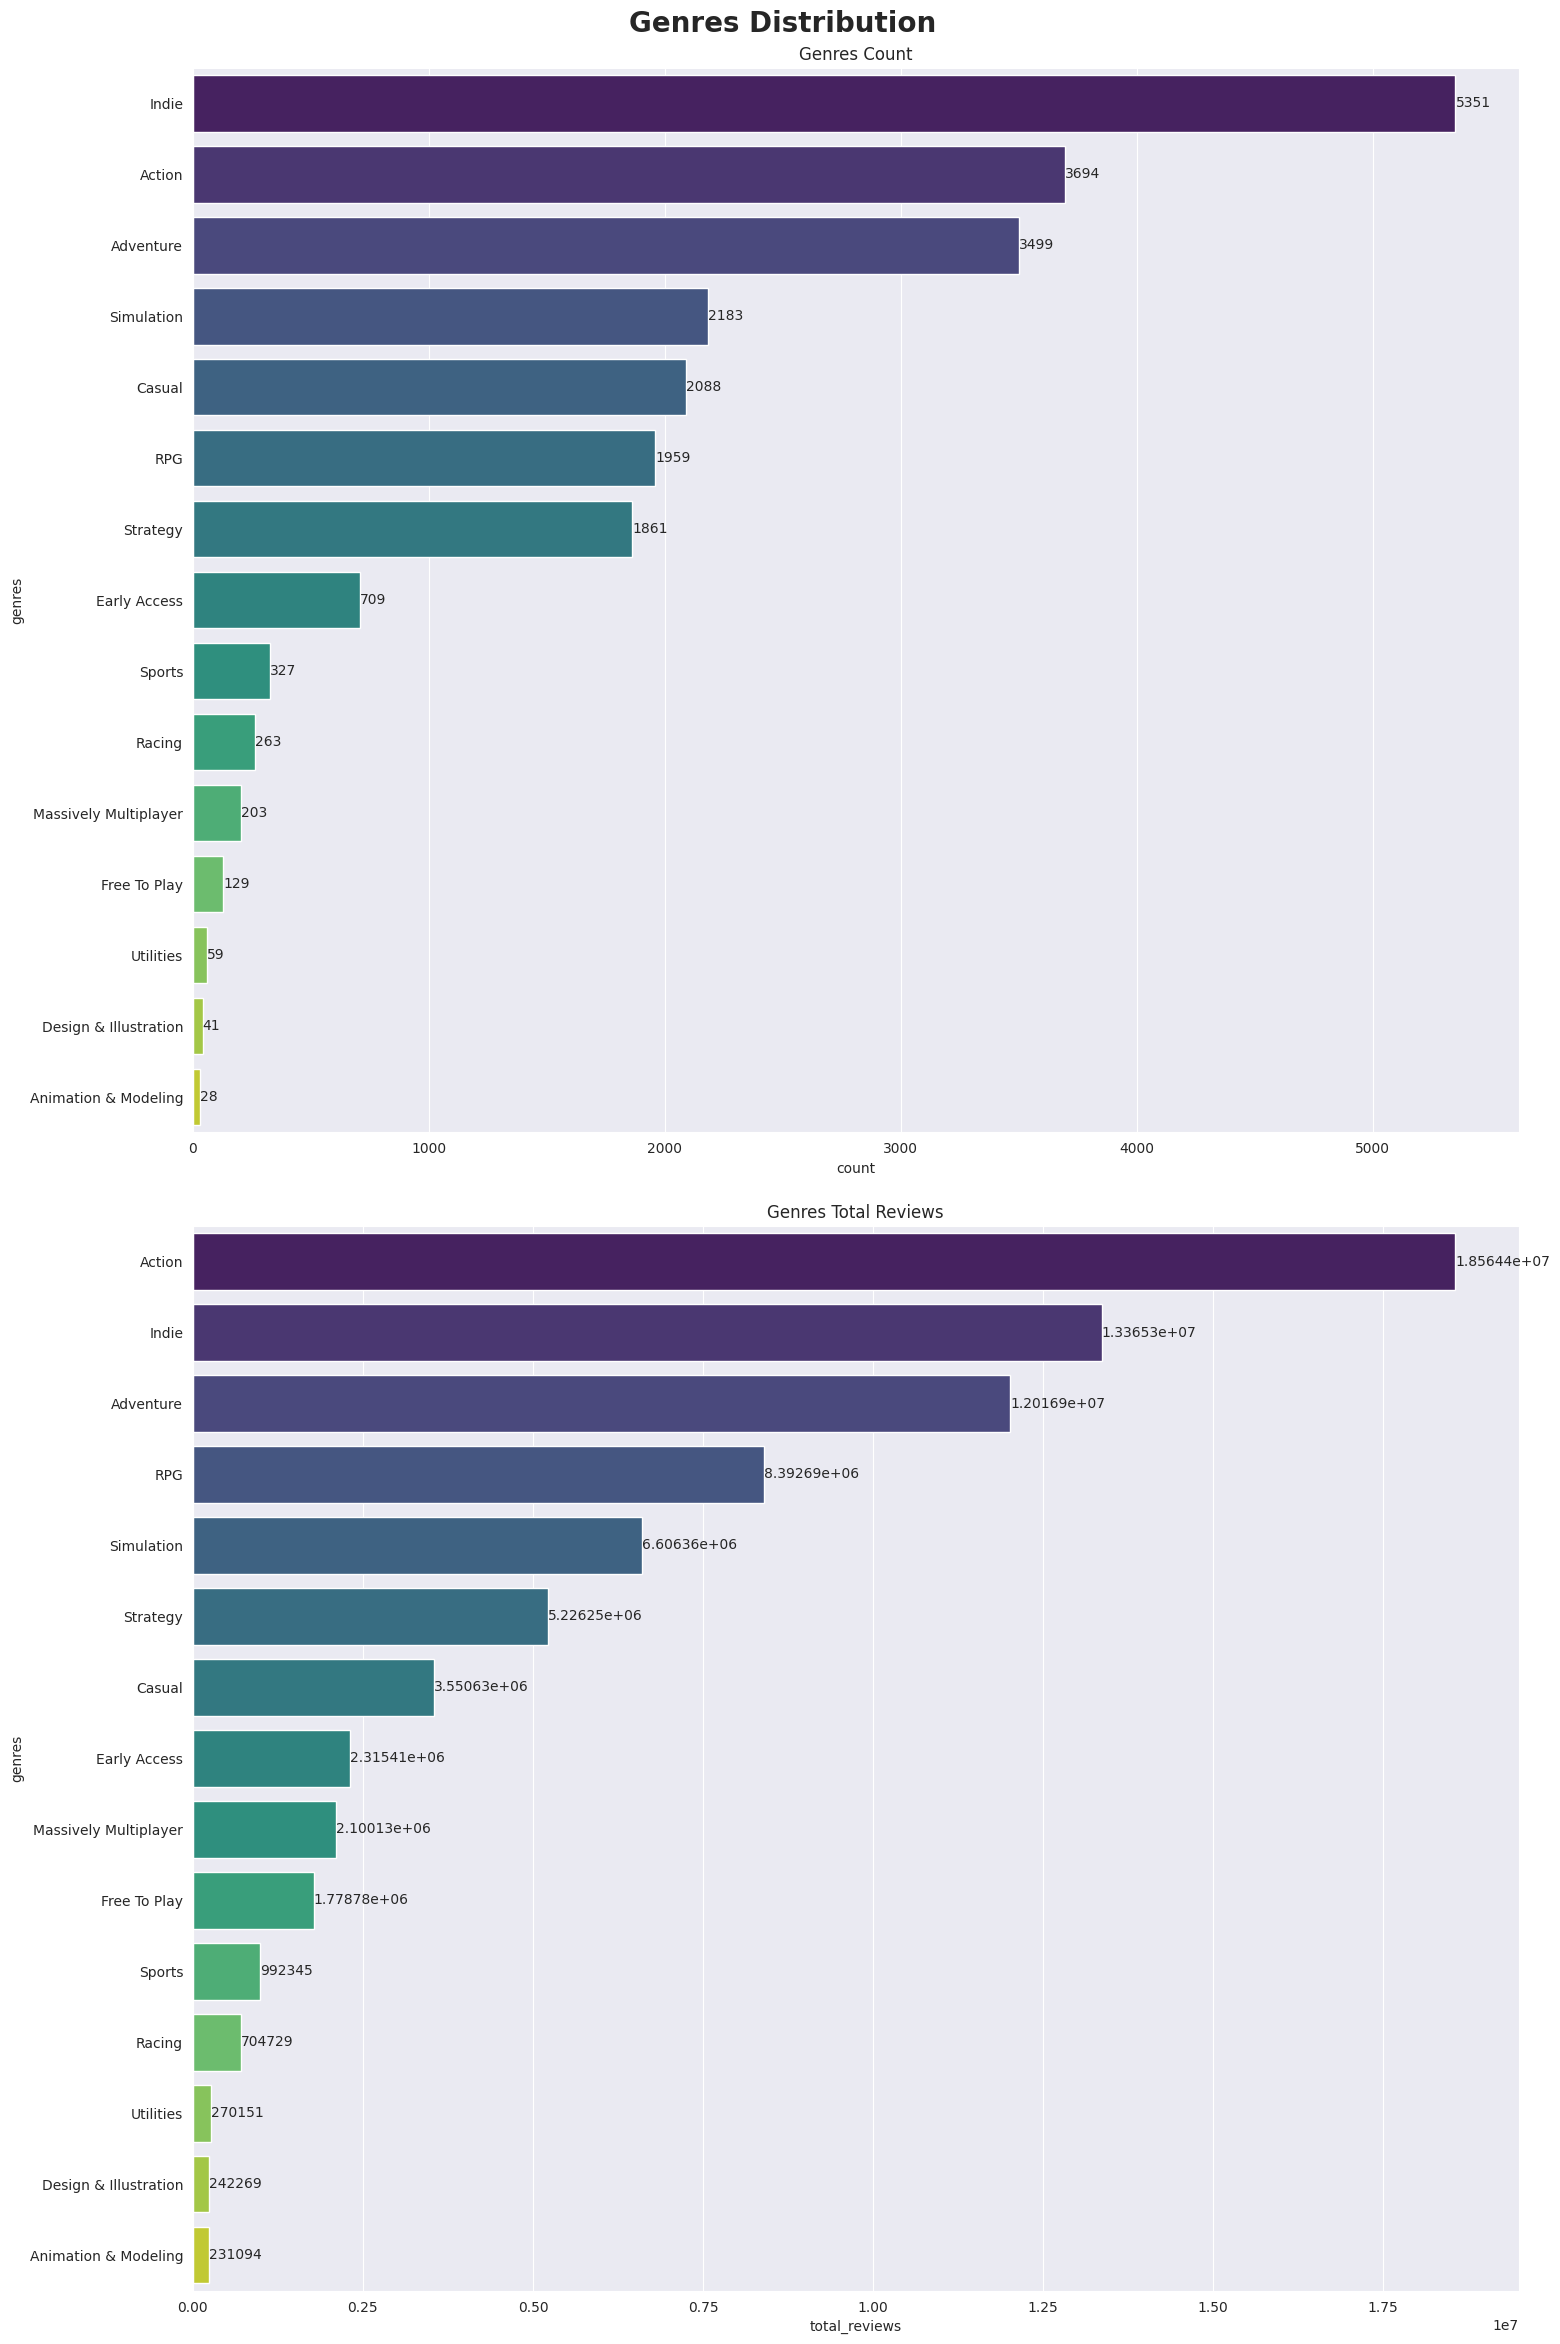

In [33]:
# combine visualization of genres by count and total reviews to get most saturated genres
fig, ax = plt.subplots(2, 1, figsize=(16,24))

sns.barplot(genres.head(15), x='count', y='genres', hue='genres', ax=ax[0], legend=False, palette='viridis')
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Genres Count')

sns.barplot(genres2.sort_values('total_reviews', ascending=False).head(15), x='total_reviews', y='genres', hue='genres', ax=ax[1], legend=False, palette='viridis')
for container in ax[1].containers:
    ax[1].bar_label(container)
ax[1].set_title('Genres Total Reviews')

fig.suptitle('Genres Distribution', fontsize=20, fontweight=700)

plt.tight_layout(pad=2)
plt.show()

### 4.1.2 Genres with Highest Positive Reviews Percentage

In [34]:
genres_percentage = genres_df.groupby('genres')['positive_percentual'].mean().sort_values(ascending=False).reset_index()

In [35]:
total_reviews = genres_df.groupby('genres')['total_reviews'].sum().sort_values(ascending=False).reset_index()
positive = genres_df.groupby('genres')['total_positive'].sum().sort_values(ascending=False).reset_index()
negative = genres_df.groupby('genres')['total_negative'].sum().sort_values(ascending=False).reset_index()
total_games = genres_df.groupby('genres')['steam_appid'].count().sort_values(ascending=False).reset_index()
total_games.rename(columns={'steam_appid':'total_games_count'}, inplace=True)

In [36]:
total_reviews

,genres,total_reviews
0,Action,18564399
1,Indie,13365296
2,Adventure,12016936
3,RPG,8392690
4,Simulation,6606364
5,Strategy,5226254
6,Casual,3550627
7,Early Access,2315407
8,Massively Multiplayer,2100133
9,Free To Play,1778777


In [37]:
detail_reviews = pd.merge(positive, negative, on='genres')
detail_reviews['sum_of_reviews'] = total_reviews['total_reviews']
detail_reviews

,genres,total_positive,total_negative,sum_of_reviews
0,Action,16142623,2421776,18564399
1,Indie,12195219,1170077,13365296
2,Adventure,10600067,1416869,12016936
3,RPG,7473090,919600,8392690
4,Simulation,5893671,712693,6606364
5,Strategy,4637016,589238,5226254
6,Casual,3251326,299301,3550627
7,Early Access,2058188,257219,2315407
8,Massively Multiplayer,1662951,437182,2100133
9,Free To Play,1438455,340322,1778777


In [38]:
detail_reviews['positive_percentual'] = detail_reviews['total_positive'] / (detail_reviews['total_positive'] + detail_reviews['total_negative'])
detail_reviews['negative_percentual'] = detail_reviews['total_negative'] / (detail_reviews['total_positive'] + detail_reviews['total_negative'])

In [39]:
detail_reviews = pd.merge(detail_reviews, total_games, on='genres')
detail_reviews

,genres,total_positive,total_negative,sum_of_reviews,positive_percentual,negative_percentual,total_games_count
0,Action,16142623,2421776,18564399,0.869547,0.130453,3694
1,Indie,12195219,1170077,13365296,0.912454,0.087546,5351
2,Adventure,10600067,1416869,12016936,0.882094,0.117906,3499
3,RPG,7473090,919600,8392690,0.890428,0.109572,1959
4,Simulation,5893671,712693,6606364,0.892120,0.107880,2183
5,Strategy,4637016,589238,5226254,0.887254,0.112746,1861
6,Casual,3251326,299301,3550627,0.915705,0.084295,2088
7,Early Access,2058188,257219,2315407,0.888910,0.111090,709
8,Massively Multiplayer,1662951,437182,2100133,0.791831,0.208169,203
9,Free To Play,1438455,340322,1778777,0.808676,0.191324,129


In [40]:
# Filter by total games > 200 for more reliable data
detail_reviews = detail_reviews[detail_reviews['total_games_count'] > 200]

In [41]:
print(genres_percentage[genres_percentage['genres'] == 'Action']['positive_percentual'])
print('\n')
print(detail_reviews[detail_reviews['genres'] == 'Action']['positive_percentual'])

10    81.022252
Name: positive_percentual, dtype: float64


0    0.869547
Name: positive_percentual, dtype: float64


After comparison, it turns out that the average percentage of positive reviews in the action genre differs between the first method, which calculates directly from the ‘positive_percentage’ column, and the second method, which calculates manually by dividing the total number of positive reviews by the total number of reviews. Based on the details of each genre's reviews, the second method appears to be more reasonable and accurate. This differ occurs because the method of sum for each reviews is different:
* First method calculate the mean of positive_percentual for each row in the genres_df, which it have a total_reviews value that been deprecated to 6000 by our cleaning method.
* Second method calculate the positive_percentual by summing up the total_positive and then divide it by sum of total_positive and total_negative from each genres. This method more reasonable becaues each reviews will be recalculated.

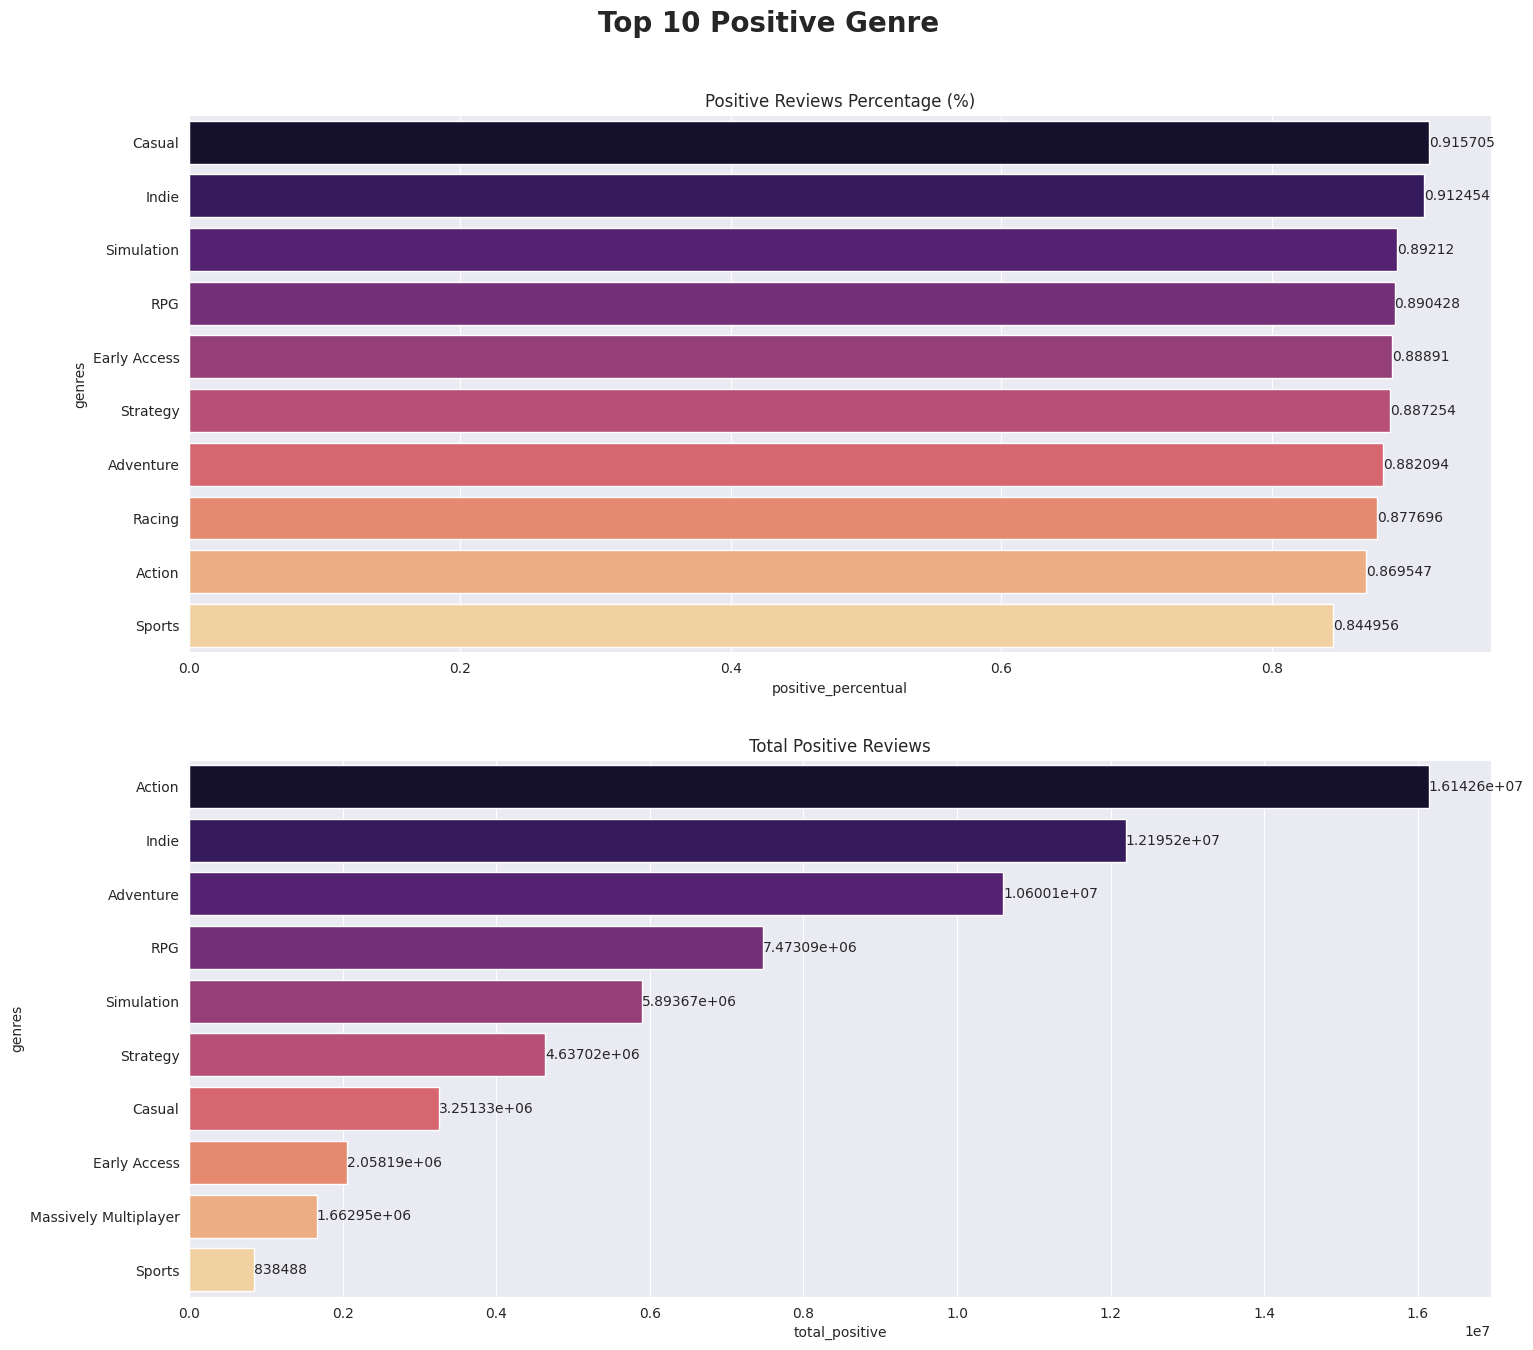

In [42]:
fig, ax = plt.subplots(2, 1, figsize=(16,14))

sns.barplot(detail_reviews.sort_values('positive_percentual', ascending=False).head(10), ax=ax[0], x='positive_percentual', y='genres', hue='genres', legend=False, palette='magma')
for container in ax[0].containers:
  ax[0].bar_label(container)
ax[0].set_title('Positive Reviews Percentage (%)')

sns.barplot(detail_reviews.sort_values('total_positive', ascending=False).head(10), ax=ax[1], x='total_positive', y='genres', hue='genres', legend=False, palette='magma')
for container in ax[1].containers:
  ax[1].bar_label(container)
ax[1].set_title('Total Positive Reviews')

plt.suptitle('Top 10 Positive Genre', fontsize=20, fontweight=700)
plt.tight_layout(pad=3)
plt.show()

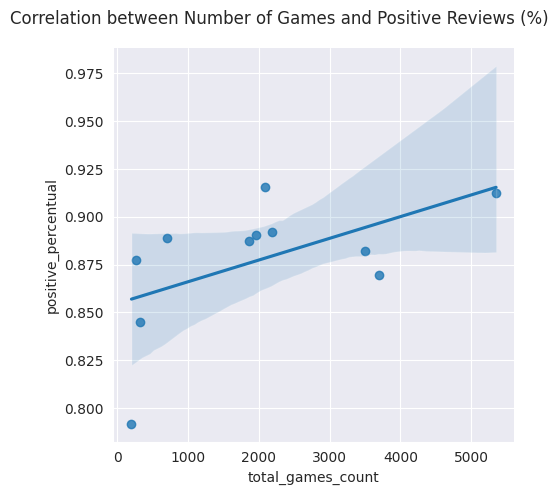

In [43]:
# Check correlation
sns.lmplot(detail_reviews, x='total_games_count', y='positive_percentual')
plt.suptitle('Correlation between Number of Games and Positive Reviews (%)')

plt.tight_layout()
plt.show()

### 4.1.3 Distribution of Games Rating Category

In [44]:
valid_review = [
    "Overwhelmingly Positive", "Very Positive", "Positive", "Mostly Positive",
    "Mixed", "Mostly Negative", "Very Negative", "Overwhelmingly Negative"
    ]

dist_review = filtered_games[filtered_games['review_score_desc'].isin(valid_review)]
dist_review.head()

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),Review_Category,price_category
24,2719290,Night Raider,[Tsukuyomi],[Tsukuyomi],"[Single-player, Family Sharing]","[Adventure, Indie]",0,61,[windows],True,...,157,19,8.0,Very Positive,89.2,0,False,5.99,not popular,Cheap
52,2717880,The Rogue Prince of Persia,[Evil Empire],[Ubisoft],"[Single-player, Steam Achievements, Full contr...","[Action, Adventure, Early Access]",0,49,[windows],True,...,490,77,8.0,Very Positive,86.4,0,False,19.99,not popular,Moderate
56,2717080,Merry XMerge,[PiHoEntertainment],[Yin Games],"[Single-player, Steam Cloud, Remote Play Toget...","[Casual, Indie, Strategy]",0,0,[windows],True,...,510,12,9.0,Overwhelmingly Positive,97.7,0,False,0.99,not popular,Cheap
63,2717260,I'm counting to 6...,[EMIKA_GAMES],[EMIKA_GAMES],"[Single-player, Steam Achievements, Partial Co...","[Adventure, Indie, Simulation]",0,6,[windows],True,...,129,28,8.0,Very Positive,82.2,0,False,6.99,not popular,Cheap
83,2716110,[Chilla's Art] Jisatsu | 自撮,[Chilla's Art],[Chilla's Art],"[Single-player, Steam Achievements, Family Sha...",[Indie],0,9,[windows],True,...,154,33,8.0,Very Positive,82.4,0,False,5.99,not popular,Cheap


In [45]:
dist_review = dist_review[['steam_appid', 'name', 'review_score', 'review_score_desc', 'Review_Category']]

In [46]:
dist_review.head()

,steam_appid,name,review_score,review_score_desc,Review_Category
24,2719290,Night Raider,8.0,Very Positive,not popular
52,2717880,The Rogue Prince of Persia,8.0,Very Positive,not popular
56,2717080,Merry XMerge,9.0,Overwhelmingly Positive,not popular
63,2717260,I'm counting to 6...,8.0,Very Positive,not popular
83,2716110,[Chilla's Art] Jisatsu | 自撮,8.0,Very Positive,not popular


In [47]:
games_score = dist_review.groupby('review_score_desc')['steam_appid'].count().reset_index()
games_popularity = dist_review.groupby('Review_Category')['steam_appid'].count().reset_index()

/tmp/ipython-input-1118243564.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  games_popularity = dist_review.groupby('Review_Category')['steam_appid'].count().reset_index()


In [48]:
games_score.rename(columns={'steam_appid': 'count'}, inplace=True)
games_popularity.rename(columns={'steam_appid': 'count'}, inplace=True)

In [49]:
games_score

,review_score_desc,count
0,Mixed,1295
1,Mostly Negative,91
2,Mostly Positive,1513
3,Overwhelmingly Negative,4
4,Overwhelmingly Positive,582
5,Very Negative,8
6,Very Positive,4667


In [50]:
games_popularity

,Review_Category,count
0,not popular,5170
1,recognizable,2040
2,moderate,305
3,high popularity,645


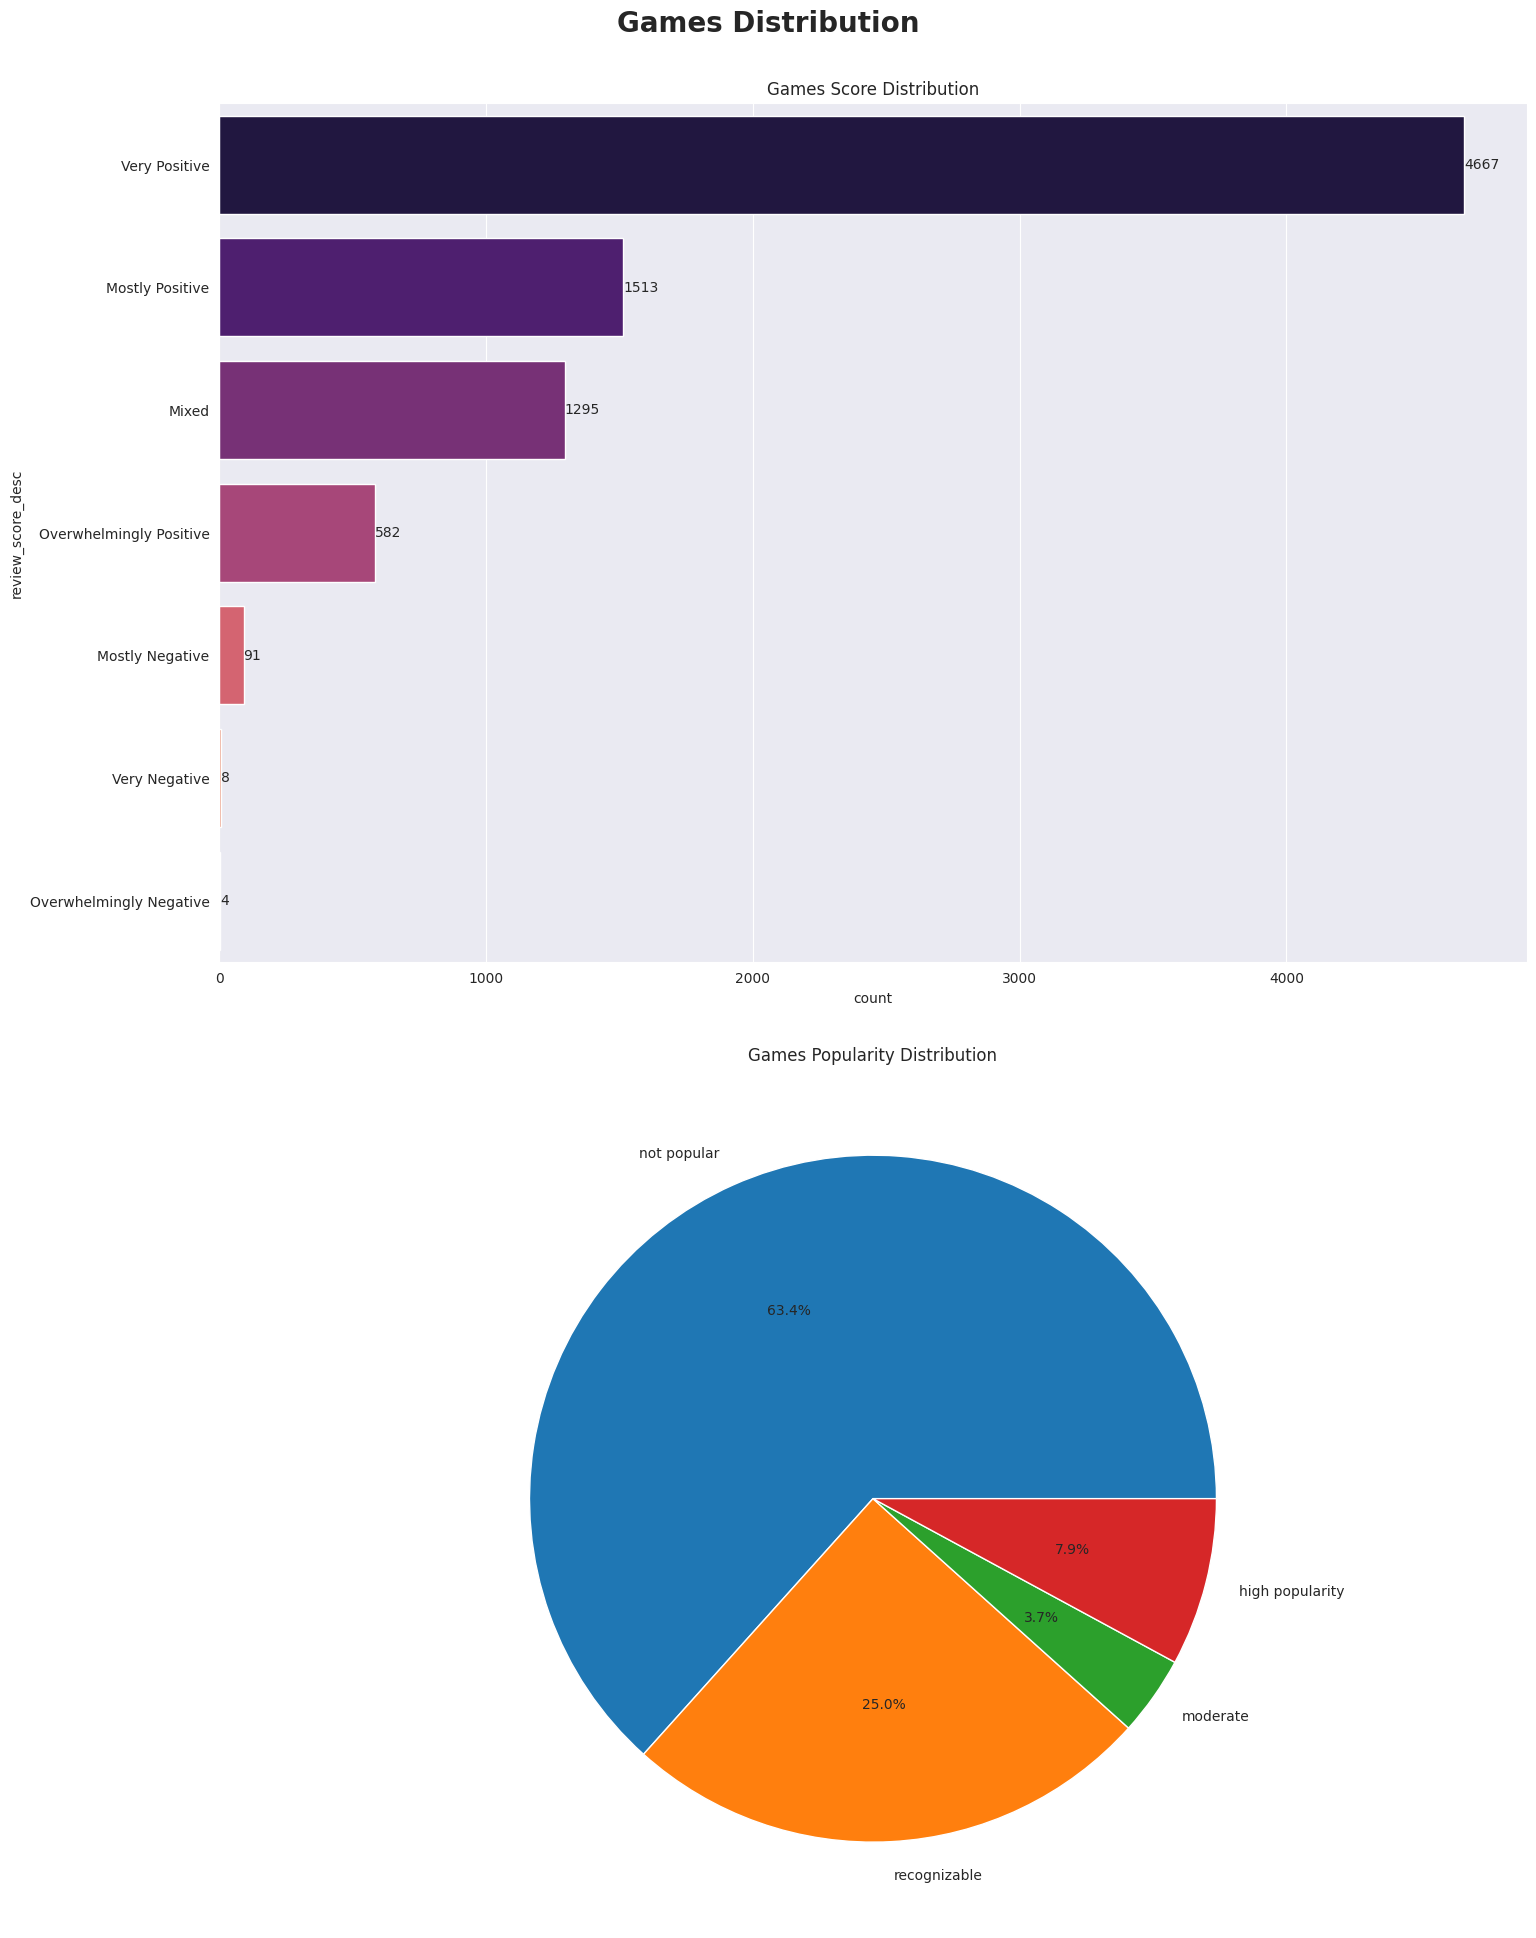

In [51]:
fig, ax = plt.subplots(2, 1, figsize=(16, 20))

sns.barplot(games_score.sort_values('count', ascending=False), ax=ax[0], x='count', y='review_score_desc', hue='review_score_desc', legend=False, palette='magma')
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Games Score Distribution')

ax[1] = plt.pie(games_popularity['count'], labels=games_popularity['Review_Category'], autopct='%1.1f%%')
plt.title('Games Popularity Distribution')

plt.suptitle('Games Distribution', fontsize=20, fontweight=700)
plt.tight_layout(pad=3)
plt.show()

## 4.2 Product and Feature Strategy

### 4.2.1 Correlation between in-games Achievement and Positive Reviews

In [52]:
filtered_games[['n_achievements', 'total_positive', 'positive_percentual']]

,n_achievements,total_positive,positive_percentual
24,61,157,89.2
52,49,490,86.4
56,0,510,97.7
63,6,129,82.2
83,9,154,82.4
...,...,...,...
58020,90,7661,99.2
58021,41,521,95.4
58028,20,391,93.1
58032,0,225,68.0


In [53]:
bins = [0, 99, 999, float('inf')]
labels = ['Least', 'Moderate', 'Many']
filtered_games['Achievement_Category'] = pd.cut(filtered_games['n_achievements'], bins=bins, labels=labels, right=True)

# Fill NaN value as least
filtered_games['Achievement_Category'].fillna('Least', inplace=True)

filtered_games.head()

/tmp/ipython-input-736228374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_games['Achievement_Category'] = pd.cut(filtered_games['n_achievements'], bins=bins, labels=labels, right=True)
/tmp/ipython-input-736228374.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filter

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),Review_Category,price_category,Achievement_Category
24,2719290,Night Raider,[Tsukuyomi],[Tsukuyomi],"[Single-player, Family Sharing]","[Adventure, Indie]",0,61,[windows],True,...,19,8.0,Very Positive,89.2,0,False,5.99,not popular,Cheap,Least
52,2717880,The Rogue Prince of Persia,[Evil Empire],[Ubisoft],"[Single-player, Steam Achievements, Full contr...","[Action, Adventure, Early Access]",0,49,[windows],True,...,77,8.0,Very Positive,86.4,0,False,19.99,not popular,Moderate,Least
56,2717080,Merry XMerge,[PiHoEntertainment],[Yin Games],"[Single-player, Steam Cloud, Remote Play Toget...","[Casual, Indie, Strategy]",0,0,[windows],True,...,12,9.0,Overwhelmingly Positive,97.7,0,False,0.99,not popular,Cheap,Least
63,2717260,I'm counting to 6...,[EMIKA_GAMES],[EMIKA_GAMES],"[Single-player, Steam Achievements, Partial Co...","[Adventure, Indie, Simulation]",0,6,[windows],True,...,28,8.0,Very Positive,82.2,0,False,6.99,not popular,Cheap,Least
83,2716110,[Chilla's Art] Jisatsu | 自撮,[Chilla's Art],[Chilla's Art],"[Single-player, Steam Achievements, Family Sha...",[Indie],0,9,[windows],True,...,33,8.0,Very Positive,82.4,0,False,5.99,not popular,Cheap,Least


In [54]:
filtered_games.groupby('Achievement_Category')['steam_appid'].count()

/tmp/ipython-input-33191572.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_games.groupby('Achievement_Category')['steam_appid'].count()


,steam_appid
Achievement_Category,
Least,7797
Moderate,332
Many,31


In [55]:
# Filter by games that have at least 100 achivements
achievement_games = filtered_games[filtered_games['Achievement_Category'] != 'Least']
achievement_games.head()

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),Review_Category,price_category,Achievement_Category
492,2693930,Dice & Fold,[Tinymice Entertainment],"[Rogue Duck Interactive, Gamersky Games]","[Single-player, Steam Achievements, Steam Clou...","[Casual, Indie, RPG, Strategy]",0,177,"[windows, mac, linux]",True,...,116,8.0,Very Positive,86.7,0,False,12.99,recognizable,Moderate,Moderate
3436,2552430,KINGDOM HEARTS -HD 1.5+2.5 ReMIX-,[Square Enix],[Square Enix],"[Single-player, Steam Achievements, Full contr...","[Action, Adventure, RPG]",0,197,[windows],True,...,821,8.0,Very Positive,81.4,0,False,49.99,moderate,Costly,Moderate
3455,2551170,Cats Hidden in Maple Hollow 🍂,[Travellin Cats],[Travellin Cats],"[Single-player, Steam Achievements, Full contr...","[Casual, Indie]",0,102,[windows],True,...,10,9.0,Overwhelmingly Positive,98.0,0,False,0.99,not popular,Cheap,Moderate
4331,2512190,Magic Pussy: Chapter 2,[Taboo Tales 💘],[Taboo Tales 💘],"[Single-player, Steam Achievements, Steam Trad...","[Adventure, Casual, RPG]",0,108,[windows],True,...,32,6.0,Mostly Positive,77.6,0,False,9.99,not popular,Cheap,Moderate
4488,2505570,Burger Shop 3,[GoBit Games],[GoBit Games],"[Single-player, Steam Cloud, Family Sharing]","[Action, Casual, Simulation, Early Access]",0,120,"[windows, mac]",True,...,6,8.0,Very Positive,98.1,0,False,4.99,not popular,Cheap,Moderate


In [56]:
achievement_games = achievement_games[['n_achievements','total_positive', 'positive_percentual', 'Achievement_Category']]
achievement_games.head()

,n_achievements,total_positive,positive_percentual,Achievement_Category
492,177,754,86.7,Moderate
3436,197,3594,81.4,Moderate
3455,102,498,98.0,Moderate
4331,108,111,77.6,Moderate
4488,120,304,98.1,Moderate


In [57]:
filtered_games[filtered_games['n_achievements'] == filtered_games['n_achievements'].max()]

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),Review_Category,price_category,Achievement_Category
42572,573060,LOGistICAL,[Sacada],[Sacada],"[Single-player, Steam Achievements, Steam Trad...","[Casual, Indie, Strategy]",0,9821,[windows],True,...,31,8.0,Very Positive,80.6,0,False,9.99,not popular,Cheap,Many


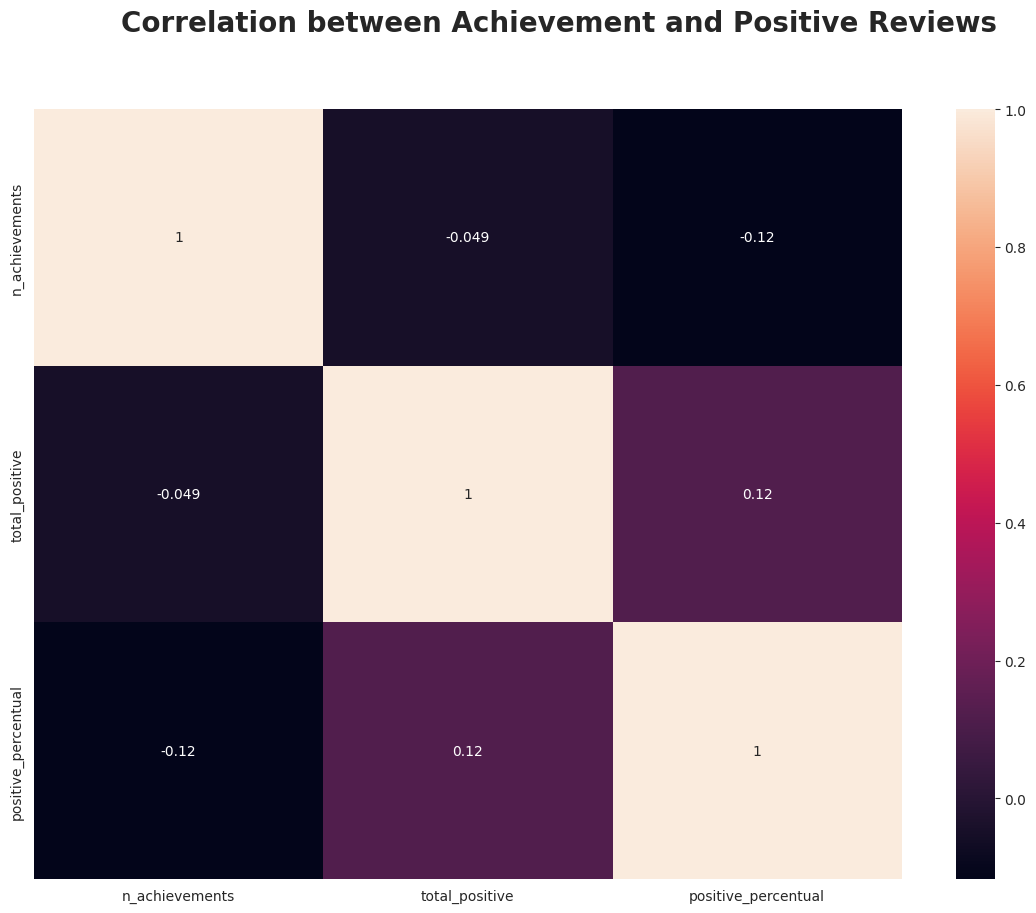

In [58]:
fig, ax = plt.subplots(figsize=(14,10))

sns.heatmap(achievement_games.drop('Achievement_Category', axis=1).corr(), annot=True)

plt.suptitle('Correlation between Achievement and Positive Reviews', fontsize=20, fontweight=700)
plt.show()

Those features almost don't have any correlation.

### 4.2.2 Average Reviews for Each Category

In [59]:
category_df = filtered_games.explode('categories')
category_df.head()

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),Review_Category,price_category,Achievement_Category
24,2719290,Night Raider,[Tsukuyomi],[Tsukuyomi],Single-player,"[Adventure, Indie]",0,61,[windows],True,...,19,8.0,Very Positive,89.2,0,False,5.99,not popular,Cheap,Least
24,2719290,Night Raider,[Tsukuyomi],[Tsukuyomi],Family Sharing,"[Adventure, Indie]",0,61,[windows],True,...,19,8.0,Very Positive,89.2,0,False,5.99,not popular,Cheap,Least
52,2717880,The Rogue Prince of Persia,[Evil Empire],[Ubisoft],Single-player,"[Action, Adventure, Early Access]",0,49,[windows],True,...,77,8.0,Very Positive,86.4,0,False,19.99,not popular,Moderate,Least
52,2717880,The Rogue Prince of Persia,[Evil Empire],[Ubisoft],Steam Achievements,"[Action, Adventure, Early Access]",0,49,[windows],True,...,77,8.0,Very Positive,86.4,0,False,19.99,not popular,Moderate,Least
52,2717880,The Rogue Prince of Persia,[Evil Empire],[Ubisoft],Full controller support,"[Action, Adventure, Early Access]",0,49,[windows],True,...,77,8.0,Very Positive,86.4,0,False,19.99,not popular,Moderate,Least


In [131]:
category = pd.DataFrame(category_df['categories'].value_counts())
category

,count
categories,
Single-player,7809
Family Sharing,7789
Steam Achievements,6034
Steam Cloud,4374
Steam Trading Cards,3706
Full controller support,3020
Multi-player,2437
Co-op,1480
Partial Controller Support,1409


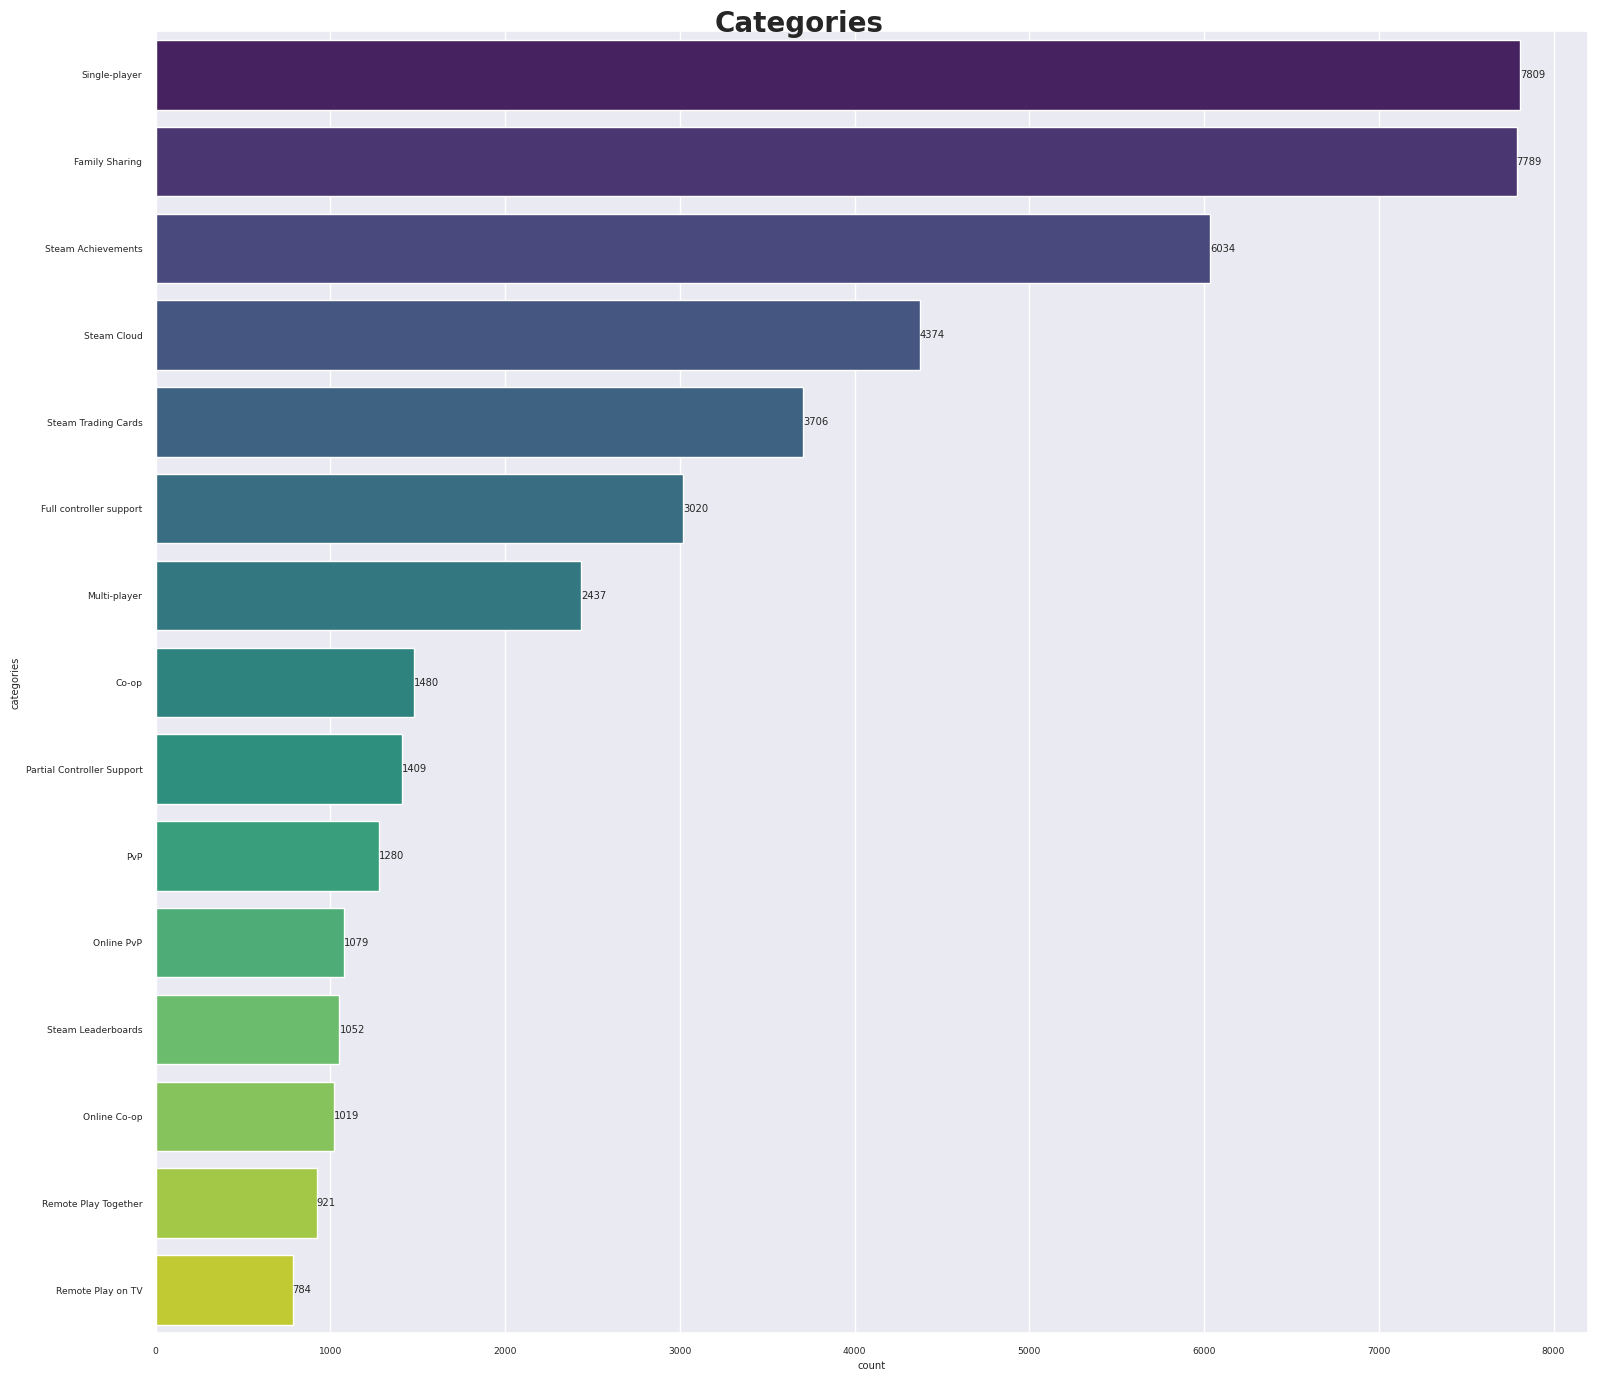

In [133]:
fig, ax = plt.subplots(figsize=(16,14))

sns.barplot(category.head(15), x='count', y='categories', hue='categories', legend=False, palette='viridis')
for container in ax.containers:
    ax.bar_label(container)

fig.suptitle('Categories', fontsize=20, fontweight=700)

plt.tight_layout()
plt.show()

In [60]:
all_games_category = category_df.groupby('categories')['steam_appid'].count().sort_values(ascending=False).reset_index()
all_games_category.rename(columns={'steam_appid':'total_games_count'}, inplace=True)

# Filter to only category that have 500+ games
all_games_category = all_games_category[all_games_category['total_games_count'] > 500]

In [61]:
avg_positive = category_df.groupby('categories')['total_positive'].mean().sort_values(ascending=False).reset_index()
avg_positive.rename(columns={'total_positive':'average_positive_reviews'}, inplace=True)
avg_negative = category_df.groupby('categories')['total_negative'].mean().sort_values(ascending=False).reset_index()
avg_negative.rename(columns={'total_negative':'average_negative_reviews'}, inplace=True)
avg_percentual = category_df.groupby('categories')['positive_percentual'].mean().sort_values(ascending=False).reset_index()
avg_percentual.rename(columns={'positive_percentual':'average_positive_percentual'}, inplace=True)
avg_total_reviews = category_df.groupby('categories')['total_reviews'].mean().sort_values(ascending=False).reset_index()
avg_total_reviews.rename(columns={'total_reviews':'average_total_reviews'}, inplace=True)

In [62]:
total_positive_category = category_df.groupby('categories')['total_positive'].sum().sort_values(ascending=False).reset_index()
total_negative_category = category_df.groupby('categories')['total_negative'].sum().sort_values(ascending=False).reset_index()

In [63]:
temp_total = pd.merge(total_positive_category, total_negative_category, on='categories')
temp_total['total_reviews'] = temp_total['total_positive'] + temp_total['total_negative']
temp_total = pd.merge(temp_total, all_games_category, on='categories')
temp_total['average_total_reviews'] = (temp_total['total_reviews'] / temp_total['total_games_count']).round(2)
temp_total.drop(['total_positive', 'total_negative', 'total_reviews', 'total_games_count'], axis=1, inplace=True)
temp_total.head()

,categories,average_total_reviews
0,Single-player,3006.12
1,Family Sharing,2922.31
2,Steam Achievements,3566.65
3,Multi-player,7362.80
4,Steam Trading Cards,4420.77


In [64]:
category_details = pd.merge(all_games_category, avg_positive, on='categories')
category_details = pd.merge(category_details, avg_negative, on='categories')
category_details = pd.merge(category_details, avg_percentual, on='categories')
category_details = pd.merge(category_details, avg_total_reviews, on='categories')
category_details.head()

,categories,total_games_count,average_positive_reviews,average_negative_reviews,average_positive_percentual,average_total_reviews
0,Single-player,7809,2676.511973,329.611474,81.979396,3006.123447
1,Family Sharing,7789,2620.392091,301.921171,81.995879,2922.313262
2,Steam Achievements,6034,3163.978290,402.671694,82.581140,3566.649983
3,Steam Cloud,4374,3269.874257,344.670782,83.942227,3614.545039
4,Steam Trading Cards,3706,3953.198327,467.571506,81.557825,4420.769833


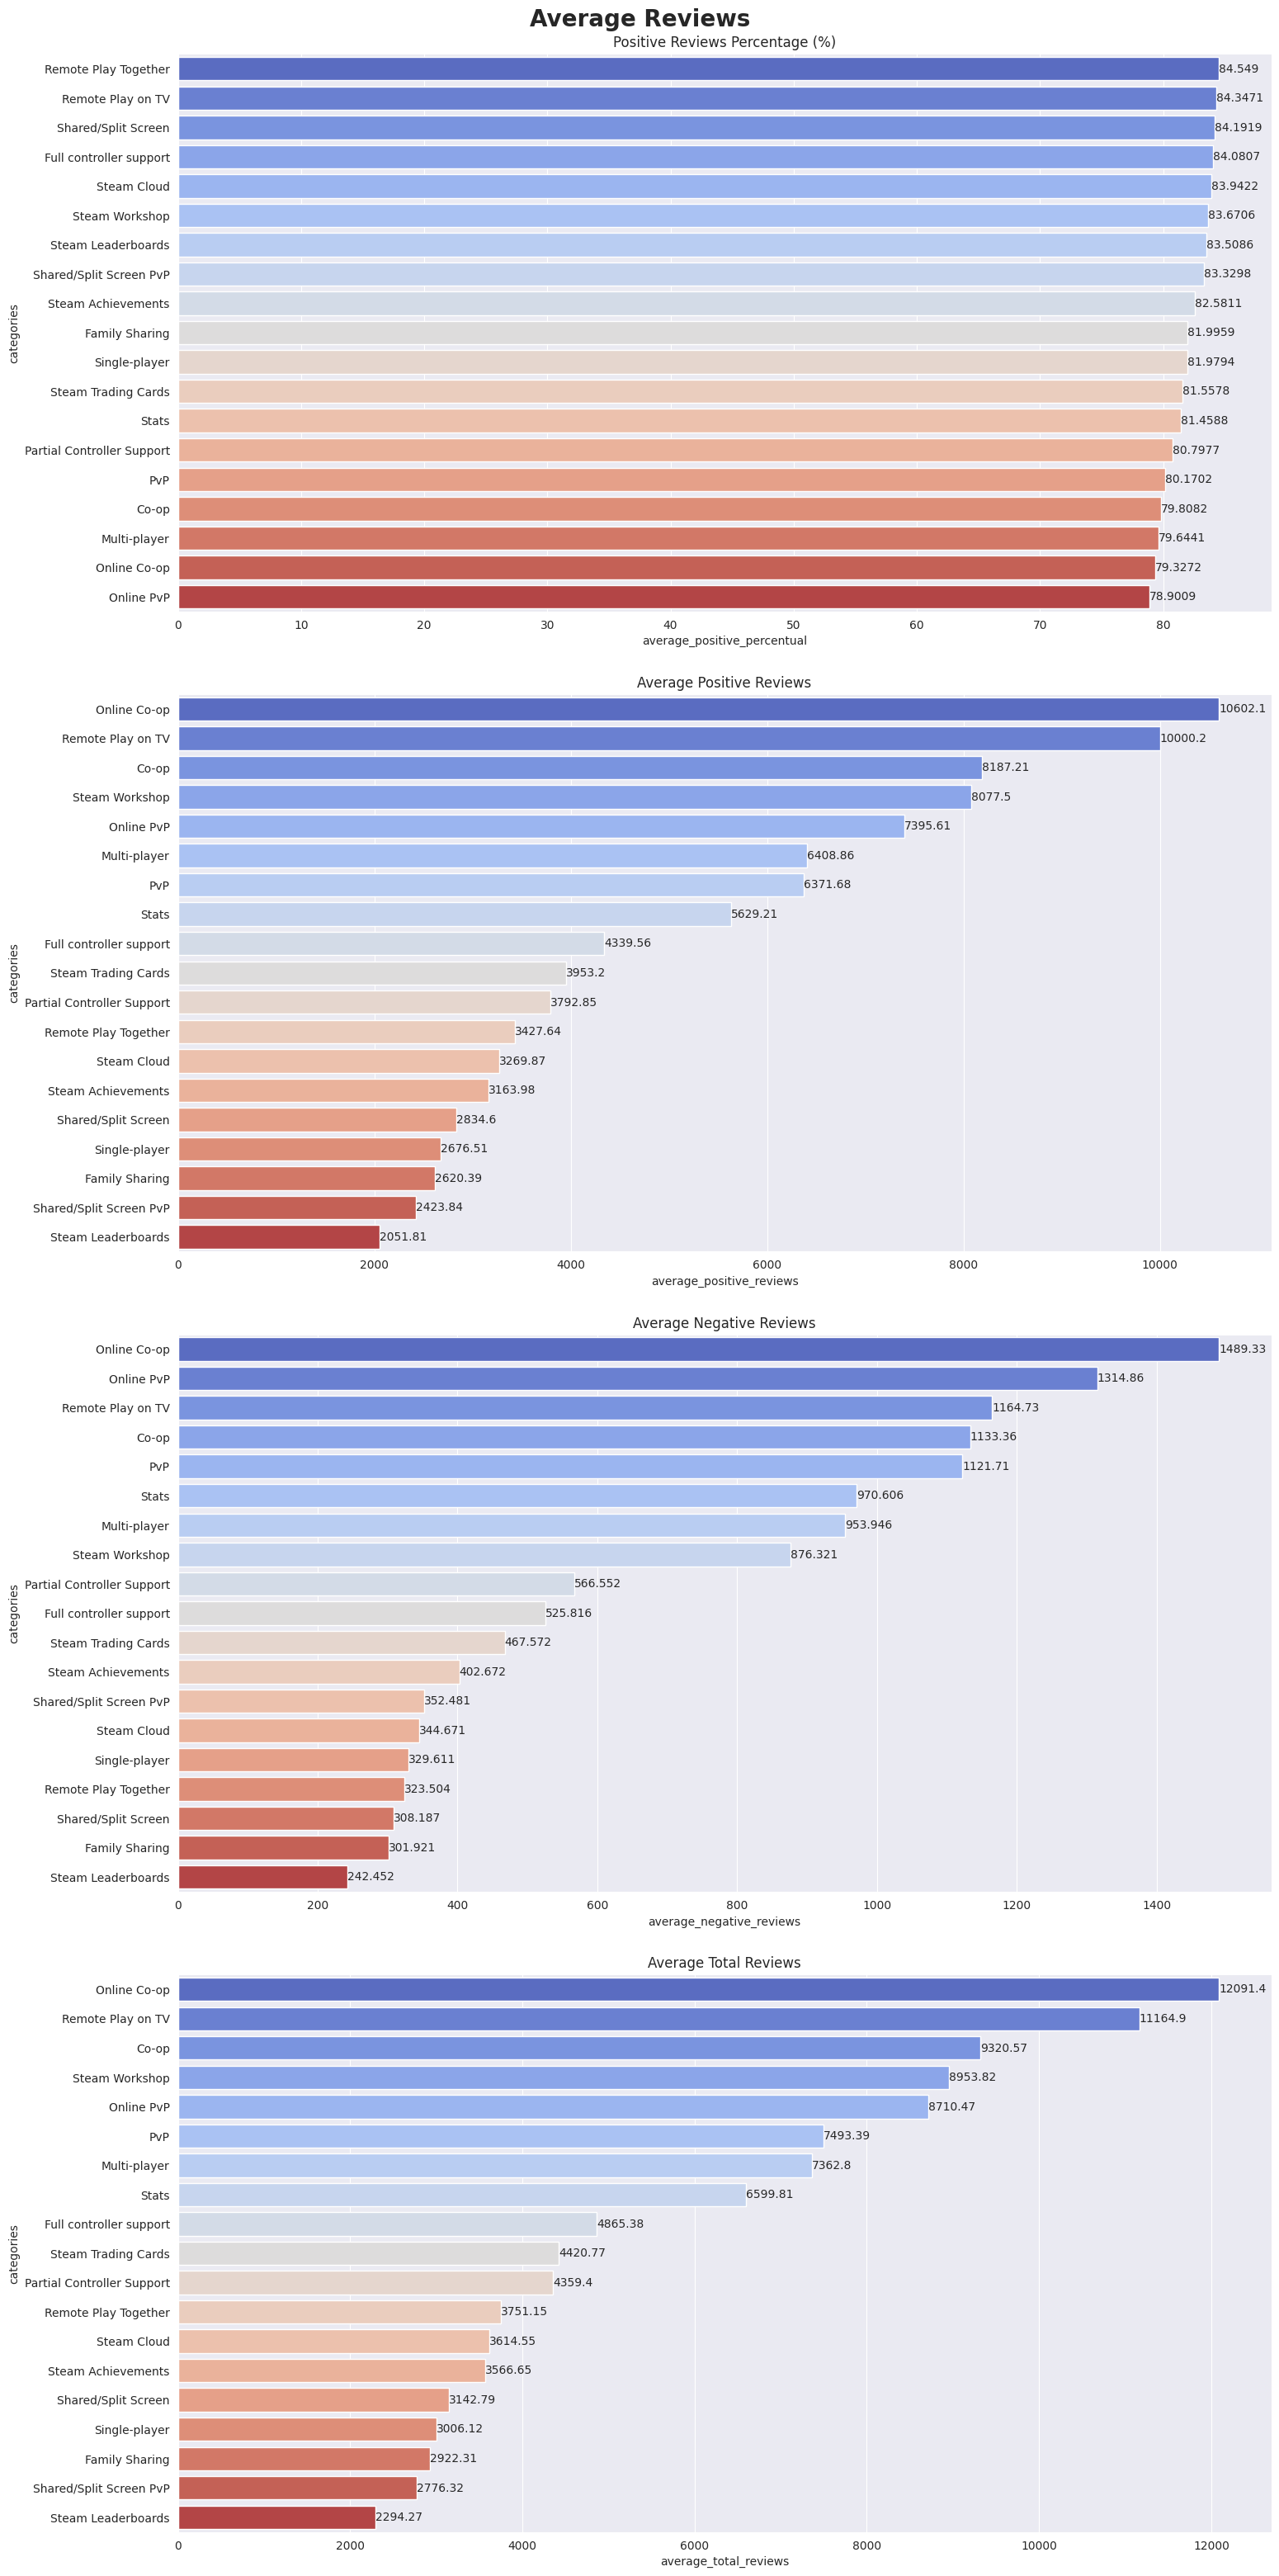

In [65]:
fig, ax = plt.subplots(4, 1, figsize=(16, 32))

sns.barplot(category_details.sort_values('average_positive_percentual', ascending=False), ax=ax[0], x='average_positive_percentual', y='categories', hue='categories', legend=False, palette='coolwarm')
for container in ax[0].containers:
  ax[0].bar_label(container)
ax[0].set_title('Positive Reviews Percentage (%)')

sns.barplot(category_details.sort_values('average_positive_reviews', ascending=False), ax=ax[1], x='average_positive_reviews', y='categories', hue='categories', legend=False, palette='coolwarm')
for container in ax[1].containers:
  ax[1].bar_label(container)
ax[1].set_title('Average Positive Reviews')

sns.barplot(category_details.sort_values('average_negative_reviews', ascending=False), ax=ax[2], x='average_negative_reviews', y='categories', hue='categories', legend=False, palette='coolwarm')
for container in ax[2].containers:
  ax[2].bar_label(container)
ax[2].set_title('Average Negative Reviews')

sns.barplot(category_details.sort_values('average_total_reviews', ascending=False), ax=ax[3], x='average_total_reviews', y='categories', hue='categories', legend=False, palette='coolwarm')
for container in ax[3].containers:
  ax[3].bar_label(container)
ax[3].set_title('Average Total Reviews')

plt.suptitle('Average Reviews', fontsize=20, fontweight=700)
plt.tight_layout(pad=2.5)
plt.show()

## 4.3 Pricing and Monetization Strategy

### 4.3.1 Correlation between Price and Game's Positive Review Percentage

In [66]:
# Filter by paid games
paid_games = filtered_games[filtered_games['is_free'] == False]

In [67]:
corr = paid_games[['price_initial (USD)', 'positive_percentual']].corr()
corr

,price_initial (USD),positive_percentual
price_initial (USD),1.000000,-0.020617
positive_percentual,-0.020617,1.000000


<Axes: >

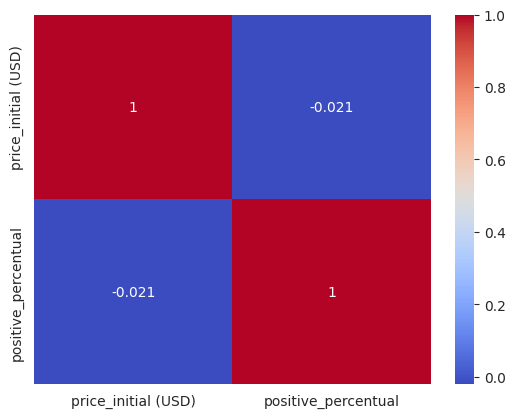

In [68]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

It looks like price and positive reviews percentage doesn't have an important relationship. The positive reviews probably coming from games feature like achievement, in-game feature, etc.

<Axes: >

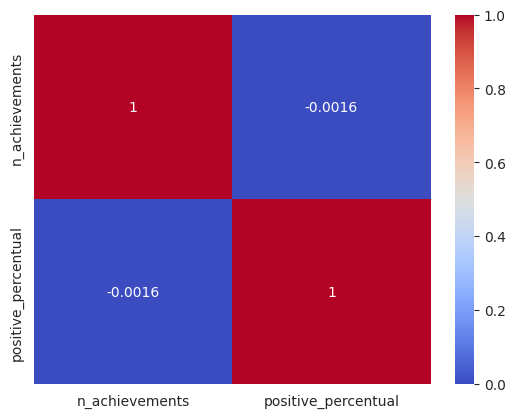

In [69]:
# Check correlation between positive reviews percentage with achievements
ach_corr = paid_games[['n_achievements', 'positive_percentual']].corr()
sns.heatmap(ach_corr, annot=True, cmap='coolwarm')

It still look like it doesn't have any meaningful correlation. This can be because of lack of detailed performance by that game.

### 4.3.2 Free vs Paid Games (total_reviews & reviews score)

In [70]:
free_games = filtered_games[filtered_games['is_free'] == True]
free_games.head()

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),Review_Category,price_category,Achievement_Category
5675,1028570,Lofi Ping Pong,[Calvares],[Kalvarez A. Party],"[Single-player, Multi-player, Shared/Split Scr...",[Indie],0,5,[windows],True,...,65,8.0,Very Positive,84.4,0,True,0.0,not popular,Cheap,Least
6535,998930,Seek Girl,[DSGame],[DSGame],"[Single-player, Steam Achievements, Steam Trad...","[Action, Casual, Indie]",0,160,[windows],True,...,79,8.0,Very Positive,80.3,0,True,0.0,not popular,Cheap,Moderate
7897,946660,Loria,[Loria],[Loria],[Single-player],[Strategy],0,0,"[windows, mac, linux]",True,...,19,8.0,Very Positive,81.7,0,True,0.0,not popular,Cheap,Least
7941,945460,Zombie Builder Defense,[Noham Games],[Noham Games],"[Single-player, Multi-player, PvP, Online PvP,...",[Action],0,9,[windows],True,...,18,8.0,Very Positive,85.6,0,True,0.0,not popular,Cheap,Least
8100,939510,Pandemic Express - Zombie Escape,"[TALLBOYS, tinyBuild]",[tinyBuild],"[Multi-player, PvP, Online PvP]","[Action, Indie, Massively Multiplayer]",0,27,[windows],True,...,390,5.0,Mixed,60.7,0,True,0.0,recognizable,Cheap,Least


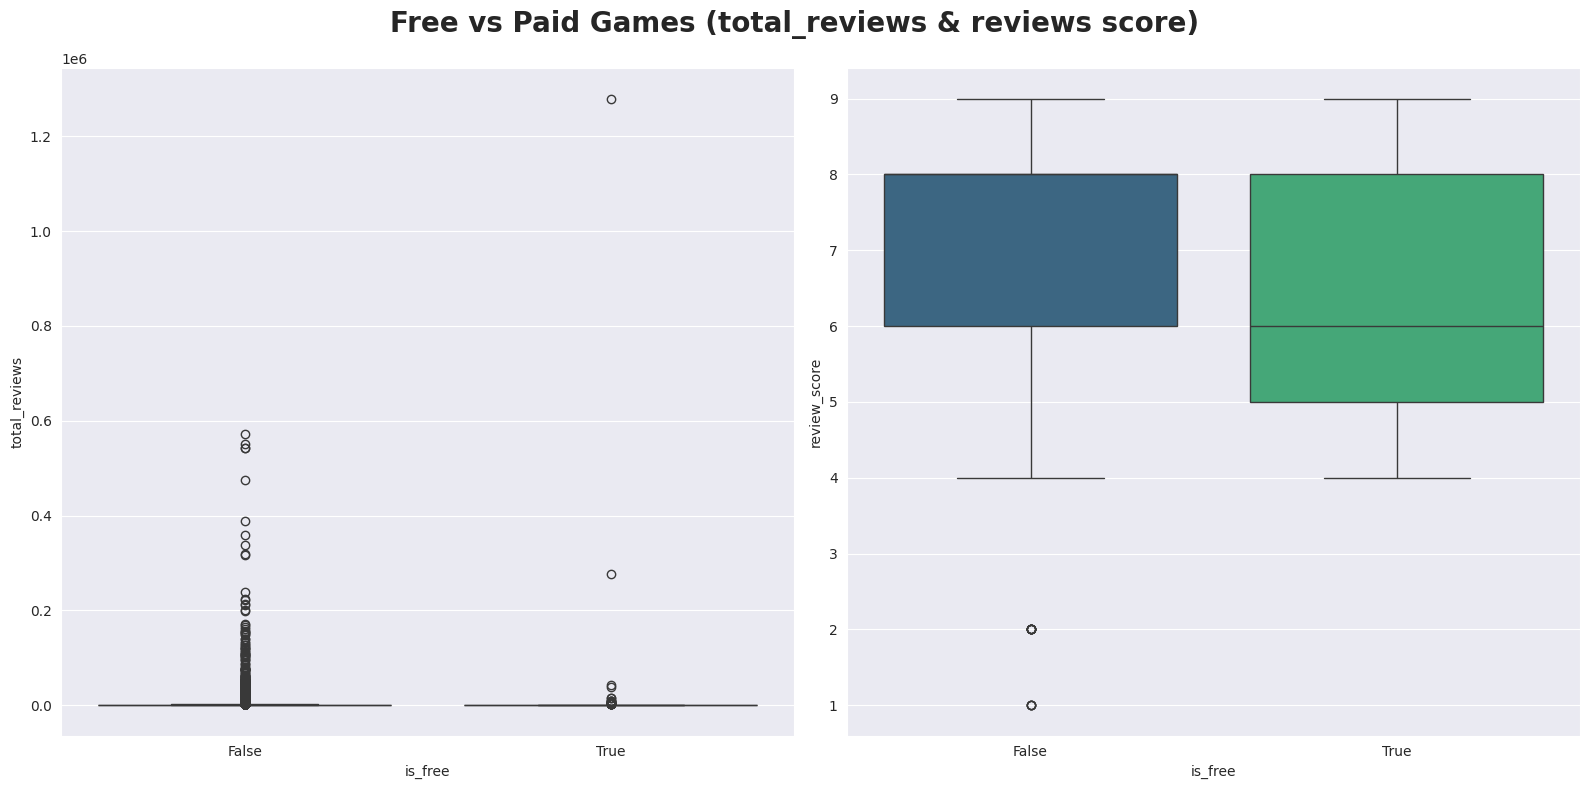

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.boxplot(filtered_games, x='is_free', y='total_reviews', ax=ax[0], hue='is_free', palette='viridis', legend=False)

sns.boxplot(filtered_games, x='is_free', y='review_score', ax=ax[1], hue='is_free', palette='viridis', legend=False)

plt.suptitle('Free vs Paid Games (total_reviews & reviews score)', fontsize=20, fontweight=700)
plt.tight_layout()
plt.show()

This visualization show that paid games have more reviews and mostly have a review in range of 6 to 8.

In [72]:
filtered_games.groupby('is_free').agg(
    avg_review= ('review_score', 'mean'),
    max_review= ('review_score', 'max'),
    min_review= ('review_score', 'min'),
    median_review= ('review_score', 'median'),
    total_games = ('steam_appid', 'count')
)

,avg_review,max_review,min_review,median_review,total_games
is_free,,,,,
False,7.182970,9.0,1.0,8.0,7974
True,6.634409,9.0,4.0,6.0,186


In [73]:
filtered_games.groupby('is_free').agg(
    avg_review= ('total_reviews', 'mean'),
    max_review= ('total_reviews', 'max'),
    min_review= ('total_reviews', 'min'),
    median_review= ('total_reviews', 'median'),
    total_games = ('steam_appid', 'count')
)

,avg_review,max_review,min_review,median_review,total_games
is_free,,,,,
False,3372.636569,571834,100,357.5,7974
True,9764.983871,1279700,100,264.5,186


### 4.3.3 Correlation between Price and Critical Acclaim (Metacritic Score)

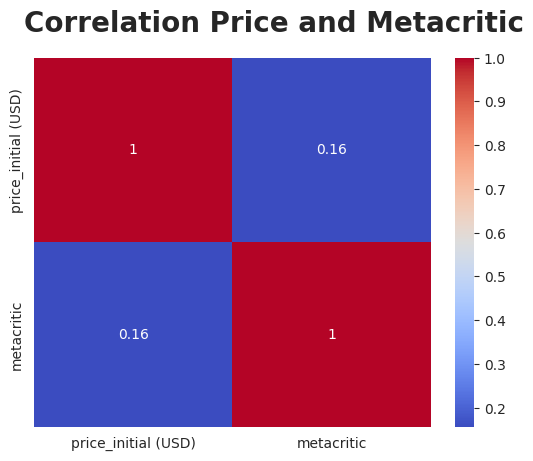

In [74]:
metacritic_corr = paid_games[['price_initial (USD)', 'metacritic']].corr()
sns.heatmap(metacritic_corr, annot=True, cmap='coolwarm')
plt.suptitle('Correlation Price and Metacritic', fontsize=20, fontweight=700)
plt.show()

## 4.4 Answering The Question

With all the analysis we're doing in EDA, we can at least answer the question we made up before.

### 4.4.1 Market Landscape: Where to Compete

Our analysis reveals a clear picture of the Steam market.
* **Most Common and Saturated Genre**

  The market flooded with a games tagged as 'Indie', 'Action', and 'Adventure' followed by 'Simulation', 'Casual', 'RPG', and 'Strategy. Launching with this genres meaning competing with many other titles, but it give a chance to get easily recognize by user.
* **Highest Positive Rate Genre**

  Some genre that show up with high percentage of positive reviews are 'Casual', 'Indie', 'Simulation', and 'RPG'. However if we look by total positive reviews, 'Action' will be show up on top of the chart. Although it have so many positive reviews, 'Action' have some negative reviews too, make it only top 9 on percentage value. This give us information that it sometimes top genre in the market don't always have positive performance in the end.

* **Game Rating Category**
  There is so many game with positive rating, but it's not come from all the game that been released. In other side, there is many unpopular games that have total reviews below 600. This mean there are many games that don't have steam rating like 'positive' or 'negative', so the distribution rating doesn't seem so accurate.


### 4.4.2 Product Strategy

The features you build into your game have a measurable impact on its reception.
* **Achivement are Nice, but Not that Essential**

  There is no strong correlation between the number of achievements and a game's review score. A small, meaningful set of achievements is sufficient
* **Game Categories Matter**

  With so much 'Single-Player' game scattered on the market, it seems there is many of it that only have a few reviews. It can be seen by the average review, game with 'Single-Player' category doesn't have that many of reviews. Instead we got some underrated category like 'Remote Play' kind of game on the average positive percentage reviews. Besides that, 'Online Co-op' games performs well on the market. It got so many review but unfortunately it have so much negative reviews too by the average. While 'Online Co-op' can attract a large audience, it is also more likely to receive mixed reviews, likely due to the complexities of balancing, matchmaking, and server maintenance.

### 4.4.3 Pricing Strategy

Pricing model is one of the the most critical decisions to make a game.
* **Surprise from Paid Games**

  Although paid games doesn't have any high correlation with reviews and critics, it still have a much higher chance of receiving high popularity. There is insufficient evidence to prove why paid games are far more popular.

* **Free To Play doesn't End Very Well**

  Free To Play games surprisingly ended with very few popularity compared to the paid games. With this dataset, we can't uncover much information about what factor make this type of game performs really well in the market.


# 5. Classification

In [77]:
category = [
    "Overwhelmingly Positive", "Very Positive", "Mostly Positive",
    "Mixed", "Mostly Negative", "Very Negative", "Overwhelmingly Negative"
    ]

train_df = filtered_games[filtered_games['review_score_desc'].isin(category)]
train_df.head()

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD),Review_Category,price_category,Achievement_Category
24,2719290,Night Raider,[Tsukuyomi],[Tsukuyomi],"[Single-player, Family Sharing]","[Adventure, Indie]",0,61,[windows],True,...,19,8.0,Very Positive,89.2,0,False,5.99,not popular,Cheap,Least
52,2717880,The Rogue Prince of Persia,[Evil Empire],[Ubisoft],"[Single-player, Steam Achievements, Full contr...","[Action, Adventure, Early Access]",0,49,[windows],True,...,77,8.0,Very Positive,86.4,0,False,19.99,not popular,Moderate,Least
56,2717080,Merry XMerge,[PiHoEntertainment],[Yin Games],"[Single-player, Steam Cloud, Remote Play Toget...","[Casual, Indie, Strategy]",0,0,[windows],True,...,12,9.0,Overwhelmingly Positive,97.7,0,False,0.99,not popular,Cheap,Least
63,2717260,I'm counting to 6...,[EMIKA_GAMES],[EMIKA_GAMES],"[Single-player, Steam Achievements, Partial Co...","[Adventure, Indie, Simulation]",0,6,[windows],True,...,28,8.0,Very Positive,82.2,0,False,6.99,not popular,Cheap,Least
83,2716110,[Chilla's Art] Jisatsu | 自撮,[Chilla's Art],[Chilla's Art],"[Single-player, Steam Achievements, Family Sha...",[Indie],0,9,[windows],True,...,33,8.0,Very Positive,82.4,0,False,5.99,not popular,Cheap,Least


In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8160 entries, 24 to 58039
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   steam_appid           8160 non-null   int64   
 1   name                  8160 non-null   object  
 2   developers            8160 non-null   object  
 3   publishers            8160 non-null   object  
 4   categories            8160 non-null   object  
 5   genres                8160 non-null   object  
 6   required_age          8160 non-null   int64   
 7   n_achievements        8160 non-null   int64   
 8   platforms             8160 non-null   object  
 9   is_released           8160 non-null   bool    
 10  release_date          8160 non-null   object  
 11  additional_content    8160 non-null   object  
 12  total_reviews         8160 non-null   int64   
 13  total_positive        8160 non-null   int64   
 14  total_negative        8160 non-null   int64   
 15  review_

We assume that when XYZ Company start to making game, they will only have certain features like category, genre, achievement, platforms, release date, free/paid, and price (if paid).

In [79]:
# Make 2 train df using categories and genres bcs too many row of data if using that two column together
train_df_genre = train_df[['genres', 'n_achievements', 'platforms', 'is_free', 'price_initial (USD)', 'review_score_desc']].copy()
train_df_category = train_df[['categories','n_achievements', 'platforms', 'is_free', 'price_initial (USD)', 'review_score_desc']].copy()

## 5.1 Data Preprocessing

In [80]:
train_df_genre = train_df_genre.explode('genres')
print('Total row: ', train_df_genre.shape[0])

Total row:  22544


In [81]:
# Filter only top 15 genres
top_15_genres = genres2.sort_values('total_reviews', ascending=False).head(15)
train_df_genre = train_df_genre[train_df_genre['genres'].isin(top_15_genres['genres'])]
print('Total row: ', train_df_genre.shape[0])

Total row:  22394


In [82]:
train_df_category = train_df_category.explode('categories')
print('Total row: ', train_df_category.shape[0])

Total row:  50946


In [83]:
# Check top 10 category
category2 = category_df[['categories', 'total_reviews']].copy()
category2 = category2.groupby('categories')['total_reviews'].sum().reset_index()
category2.head(10)

,categories,total_reviews
0,Captions available,1665487
1,Co-op,13794446
2,Commentary available,144371
3,Cross-Platform Multiplayer,5175763
4,Family Sharing,22761898
5,Full controller support,14693447
6,HDR available,1174296
7,In-App Purchases,5402930
8,Includes Source SDK,90033
9,Includes level editor,2663833


In [84]:
# Filter to top 10 to reduce row data
top_10_category = category2.sort_values('total_reviews', ascending=False).head(10)
train_df_category = train_df_category[train_df_category['categories'].isin(top_10_category['categories'])]
print('Total row: ', train_df_category.shape[0])

Total row:  38090


In [85]:
train_df_genre = train_df_genre.explode('platforms')
print('Total row: ', train_df_genre.shape[0])

Total row:  35811


In [86]:
train_df_category = train_df_category.explode('platforms')
print('Total row: ', train_df_category.shape[0])

Total row:  61341


In [87]:
train_df_genre_encoded = pd.get_dummies(train_df_genre, columns=['genres', 'platforms'], drop_first=True, dtype = int)
train_df_genre_encoded.head()

,n_achievements,is_free,price_initial (USD),review_score_desc,genres_Adventure,genres_Animation & Modeling,genres_Casual,genres_Design & Illustration,genres_Early Access,genres_Free To Play,genres_Indie,genres_Massively Multiplayer,genres_RPG,genres_Racing,genres_Simulation,genres_Sports,genres_Strategy,genres_Utilities,platforms_mac,platforms_windows
24,61,False,5.99,Very Positive,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
24,61,False,5.99,Very Positive,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
52,49,False,19.99,Very Positive,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
52,49,False,19.99,Very Positive,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
52,49,False,19.99,Very Positive,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [88]:
train_df_genre_encoded['is_free'] = train_df_genre_encoded['is_free'].replace({True: 1, False: 0})
train_df_genre_encoded['is_free'].head()

/tmp/ipython-input-3786190995.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df_genre_encoded['is_free'] = train_df_genre_encoded['is_free'].replace({True: 1, False: 0})


,is_free
24,0
24,0
52,0
52,0
52,0


In [89]:
print('Total row: ', train_df_genre_encoded.shape[0])
print('Total column: ', train_df_genre_encoded.shape[1])

Total row:  35811
Total column:  20


In [90]:
train_df_category_encoded = pd.get_dummies(train_df_category, columns=['categories', 'platforms'], drop_first=True, dtype = int)
train_df_category_encoded.head()

,n_achievements,is_free,price_initial (USD),review_score_desc,categories_Family Sharing,categories_Full controller support,categories_Multi-player,categories_Online Co-op,categories_Remote Play on Tablet,categories_Single-player,categories_Steam Achievements,categories_Steam Cloud,categories_Steam Trading Cards,platforms_mac,platforms_windows
24,61,False,5.99,Very Positive,0,0,0,0,0,1,0,0,0,0,1
24,61,False,5.99,Very Positive,1,0,0,0,0,0,0,0,0,0,1
52,49,False,19.99,Very Positive,0,0,0,0,0,1,0,0,0,0,1
52,49,False,19.99,Very Positive,0,0,0,0,0,0,1,0,0,0,1
52,49,False,19.99,Very Positive,0,1,0,0,0,0,0,0,0,0,1


In [91]:
train_df_category_encoded['is_free'] = train_df_category_encoded['is_free'].replace({True: 1, False: 0})
train_df_category_encoded['is_free'].head()

/tmp/ipython-input-4254624914.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df_category_encoded['is_free'] = train_df_category_encoded['is_free'].replace({True: 1, False: 0})


,is_free
24,0
24,0
52,0
52,0
52,0


In [92]:
print('Total row: ', train_df_category_encoded.shape[0])
print('Total column: ', train_df_category_encoded.shape[1])

Total row:  61341
Total column:  15


In [93]:
# from sklearn.preprocessing import OrdinalEncoder

# # rev_score_encoder = OrdinalEncoder(categories=[['Overwhelmingly Negative', 'Very Negative', 'Mostly Negative', 'Mixed', 'Mostly Positive', 'Very Positive', 'Overwhelmingly Positive']])
# rev_category_encoder = OrdinalEncoder(categories=[['not popular', 'recognizable', 'moderate', 'high popularity']])
# price_category_encoder = OrdinalEncoder(categories=[['Cheap', 'Moderate', 'Costly', 'Very costly']])
# ach_category_encoder = OrdinalEncoder(categories=[['Least', 'Moderate', 'Many']])

# # train_df_encoded['review_score_desc'] = rev_score_encoder.fit_transform(train_df_encoded[['review_score_desc']])
# train_df_encoded['Review_Category'] = rev_category_encoder.fit_transform(train_df_encoded[['Review_Category']])
# train_df_encoded['price_category'] = price_category_encoder.fit_transform(train_df_encoded[['price_category']])
# train_df_encoded['Achievement_Category'] = ach_category_encoder.fit_transform(train_df_encoded[['Achievement_Category']])

# train_df_encoded.head()

In [94]:
from sklearn.model_selection import train_test_split

X_genre = train_df_genre_encoded.drop(['review_score_desc'], axis=1)
y_genre = train_df_genre_encoded['review_score_desc']

X_train_genre, X_test_genre, y_train_genre, y_test_genre = train_test_split(X_genre, y_genre, test_size=0.3, random_state=42)

print(X_train_genre.shape)
print(X_test_genre.shape)
print(y_train_genre.shape)
print(y_test_genre.shape)

(25067, 19)
(10744, 19)
(25067,)
(10744,)


In [95]:
from sklearn.model_selection import train_test_split

X_category = train_df_category_encoded.drop(['review_score_desc'], axis=1)
y_category = train_df_category_encoded['review_score_desc']

X_train_category, X_test_category, y_train_category, y_test_category = train_test_split(X_category, y_category, test_size=0.3, random_state=42)

print(X_train_category.shape)
print(X_test_category.shape)
print(y_train_category.shape)
print(y_test_category.shape)

(42938, 14)
(18403, 14)
(42938,)
(18403,)


## 5.2 Data Balancing

In [96]:
# Resampling using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_genre_resampled, y_train_genre_resampled = smote.fit_resample(X_train_genre, y_train_genre)
X_train_category_resampled, y_train_category_resampled = smote.fit_resample(X_train_category, y_train_category)

In [97]:
print('Genre resample: ', X_train_genre_resampled.shape)
print('Category resample: ', X_train_category_resampled.shape)

Genre resample:  (100814, 19)
Category resample:  (176722, 14)


In [106]:
# reduce to 5000 value each label and resplit to X and Y
train_df_genre_resampled = pd.concat([X_train_genre_resampled, y_train_genre_resampled], axis=1)
train_df_genre_resampled = train_df_genre_resampled.groupby('review_score_desc').sample(n=5000, random_state=42)
train_df_genre_resampled.groupby('review_score_desc')['review_score_desc'].count()

,review_score_desc
review_score_desc,
Mixed,5000
Mostly Negative,5000
Mostly Positive,5000
Overwhelmingly Negative,5000
Overwhelmingly Positive,5000
Very Negative,5000
Very Positive,5000


In [108]:
X_train_genre_resampled = train_df_genre_resampled.drop(['review_score_desc'], axis=1)
y_train_genre_resampled = train_df_genre_resampled['review_score_desc']

print(X_train_genre_resampled.shape)
print(y_train_genre_resampled.shape)

(35000, 19)
(35000,)


In [110]:
# reduce to 5000 value each label and resplit to X and Y
train_df_category_resampled = pd.concat([X_train_category_resampled, y_train_category_resampled], axis=1)
train_df_category_resampled = train_df_category_resampled.groupby('review_score_desc').sample(n=7000, random_state=42)
train_df_category_resampled.groupby('review_score_desc')['review_score_desc'].count()

,review_score_desc
review_score_desc,
Mixed,7000
Mostly Negative,7000
Mostly Positive,7000
Overwhelmingly Negative,7000
Overwhelmingly Positive,7000
Very Negative,7000
Very Positive,7000


In [111]:
X_train_category_resampled = train_df_category_resampled.drop(['review_score_desc'], axis=1)
y_train_category_resampled = train_df_category_resampled['review_score_desc']

print(X_train_category_resampled.shape)
print(y_train_category_resampled.shape)

(49000, 14)
(49000,)


## 5.3 Predict

### 5.3.1 By Genre

In [112]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

svc_genre = SVC()
svc_genre.fit(X_train_genre_resampled, y_train_genre_resampled)

predictions_genre = svc_genre.predict(X_test_genre)
print(classification_report(y_test_genre, predictions_genre))

                         precision    recall  f1-score   support

                  Mixed       0.44      0.02      0.03      1662
        Mostly Negative       0.01      0.13      0.01       111
        Mostly Positive       0.17      0.27      0.21      1881
Overwhelmingly Negative       0.00      1.00      0.01         6
Overwhelmingly Positive       0.10      0.32      0.15       826
          Very Negative       0.00      1.00      0.01         4
          Very Positive       0.67      0.06      0.11      6254

               accuracy                           0.11     10744
              macro avg       0.20      0.40      0.07     10744
           weighted avg       0.50      0.11      0.11     10744



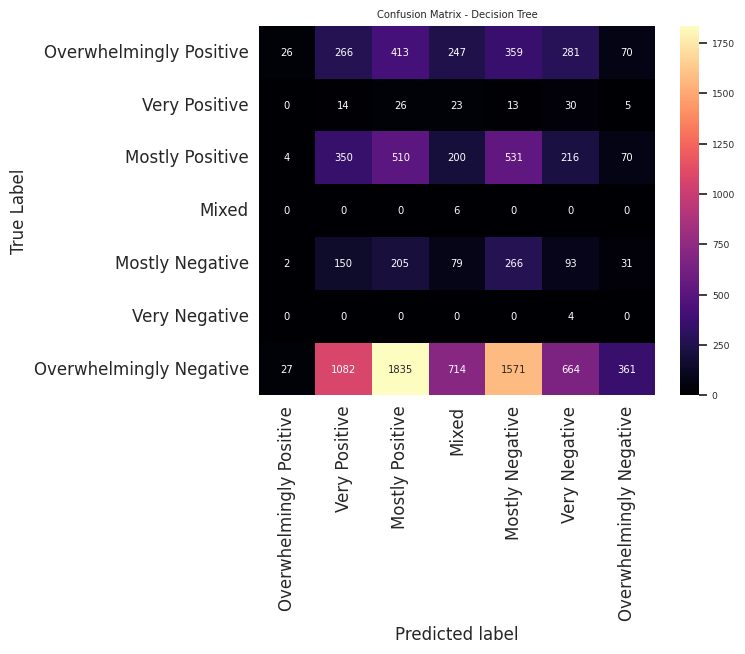

<Figure size 1600x1600 with 0 Axes>

In [113]:
cm = confusion_matrix(y_test_genre, predictions_genre)
matrix_df = pd.DataFrame(cm)

ax = plt.axes()
sns.set(font_scale=0.6)
plt.figure(figsize=(16,16))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =12)
ax.set_xticklabels(category, fontsize=12, rotation = 90)
ax.set_ylabel("True Label", fontsize=12)
ax.set_yticklabels(category, fontsize=12, rotation = 0)
plt.show()

#### 5.3.2 By Category

In [123]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

svc_category = SVC()
svc_category.fit(X_train_category_resampled, y_train_category_resampled)

predictions_category = svc_category.predict(X_test_category)
print(classification_report(y_test_category, predictions_category))

                         precision    recall  f1-score   support

                  Mixed       0.13      0.08      0.10      2356
        Mostly Negative       0.01      0.19      0.02       146
        Mostly Positive       0.20      0.31      0.24      3211
Overwhelmingly Negative       0.01      0.82      0.01        11
Overwhelmingly Positive       0.12      0.10      0.11      1685
          Very Negative       0.00      0.29      0.00         7
          Very Positive       0.62      0.25      0.36     10987

               accuracy                           0.23     18403
              macro avg       0.15      0.29      0.12     18403
           weighted avg       0.43      0.23      0.28     18403



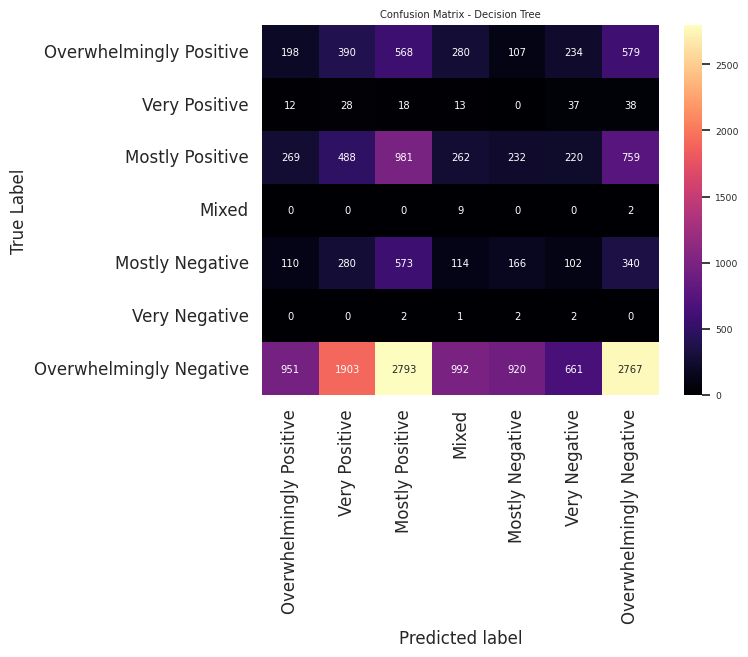

<Figure size 1600x1600 with 0 Axes>

In [124]:
cm = confusion_matrix(y_test_category, predictions_category)
matrix_df = pd.DataFrame(cm)

ax = plt.axes()
sns.set(font_scale=0.6)
plt.figure(figsize=(16,16))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =12)
ax.set_xticklabels(category, fontsize=12, rotation = 90)
ax.set_ylabel("True Label", fontsize=12)
ax.set_yticklabels(category, fontsize=12, rotation = 0)
plt.show()

Now assume that XYZ Company make a game with this information
* Achievement: 200
* paid
* 19.99 USD
* Genre: Adventure, Indie
* Category: Single-Player, Steam Achievements, Steam Cloud
* Platform: windows

Then we can predict the rating category for this game.

In [125]:
X_train_category.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42938 entries, 44079 to 55158
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   n_achievements                      42938 non-null  int64  
 1   is_free                             42938 non-null  int64  
 2   price_initial (USD)                 42938 non-null  float64
 3   categories_Family Sharing           42938 non-null  int64  
 4   categories_Full controller support  42938 non-null  int64  
 5   categories_Multi-player             42938 non-null  int64  
 6   categories_Online Co-op             42938 non-null  int64  
 7   categories_Remote Play on Tablet    42938 non-null  int64  
 8   categories_Single-player            42938 non-null  int64  
 9   categories_Steam Achievements       42938 non-null  int64  
 10  categories_Steam Cloud              42938 non-null  int64  
 11  categories_Steam Trading Cards      42938 

In [126]:
X_train_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25067 entries, 53410 to 32777
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_achievements                25067 non-null  int64  
 1   is_free                       25067 non-null  int64  
 2   price_initial (USD)           25067 non-null  float64
 3   genres_Adventure              25067 non-null  int64  
 4   genres_Animation & Modeling   25067 non-null  int64  
 5   genres_Casual                 25067 non-null  int64  
 6   genres_Design & Illustration  25067 non-null  int64  
 7   genres_Early Access           25067 non-null  int64  
 8   genres_Free To Play           25067 non-null  int64  
 9   genres_Indie                  25067 non-null  int64  
 10  genres_Massively Multiplayer  25067 non-null  int64  
 11  genres_RPG                    25067 non-null  int64  
 12  genres_Racing                 25067 non-null  int64  
 13  ge

In [127]:
print('Genre: ', X_train_genre.shape)
print('Category: ', X_train_category.shape)

Genre:  (25067, 19)
Category:  (42938, 14)


In [128]:
xyz_genre = pd.DataFrame({
    'n_achievements': [200],
    'is_free': [0],
    'price_initial (USD)': [19.99],
    'genres_Adventure': [1],
    'genres_Animation & Modeling': [0],
    'genres_Casual': [0],
    'genres_Design & Illustration': [0],
    'genres_Early Access': [0],
    'genres_Free To Play': [0],
    'genres_Indie': [1],
    'genres_Massively Multiplayer': [0],
    'genres_RPG': [0],
    'genres_Racing': [0],
    'genres_Simulation': [0],
    'genres_Sports': [0],
    'genres_Strategy': [0],
    'genres_Utilities': [0],
    'platforms_mac': [0],
    'platforms_windows': [1]
})

xyz_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_achievements                1 non-null      int64  
 1   is_free                       1 non-null      int64  
 2   price_initial (USD)           1 non-null      float64
 3   genres_Adventure              1 non-null      int64  
 4   genres_Animation & Modeling   1 non-null      int64  
 5   genres_Casual                 1 non-null      int64  
 6   genres_Design & Illustration  1 non-null      int64  
 7   genres_Early Access           1 non-null      int64  
 8   genres_Free To Play           1 non-null      int64  
 9   genres_Indie                  1 non-null      int64  
 10  genres_Massively Multiplayer  1 non-null      int64  
 11  genres_RPG                    1 non-null      int64  
 12  genres_Racing                 1 non-null      int64  
 13  genres_Si

In [129]:
xyz_category = pd.DataFrame({
    'n_achievements': [200],
    'is_free': [0],
    'price_initial (USD)': [19.99],
    'categories_Family Sharing': [0],
    'categories_Full controller support': [0],
    'categories_Multi-player': [0],
    'categories_Online Co-op': [0],
    'categories_Remote Play on Tablet': [0],
    'categories_Single-player': [1],
    'categories_Steam Achievements': [0],
    'categories_Steam Cloud': [0],
    'categories_Steam Trading Cards': [0],
    'platforms_mac': [0],
    'platforms_windows': [1]
})

xyz_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   n_achievements                      1 non-null      int64  
 1   is_free                             1 non-null      int64  
 2   price_initial (USD)                 1 non-null      float64
 3   categories_Family Sharing           1 non-null      int64  
 4   categories_Full controller support  1 non-null      int64  
 5   categories_Multi-player             1 non-null      int64  
 6   categories_Online Co-op             1 non-null      int64  
 7   categories_Remote Play on Tablet    1 non-null      int64  
 8   categories_Single-player            1 non-null      int64  
 9   categories_Steam Achievements       1 non-null      int64  
 10  categories_Steam Cloud              1 non-null      int64  
 11  categories_Steam Trading Cards      1 non-null   

In [130]:
print('Prediction of XYZ Company new game:\n')
print('By Genre: ', svc_genre.predict(xyz_genre))
print('By Category: ', svc_category.predict(xyz_category))

Prediction of XYZ Company new game:

By Genre:  ['Mostly Negative']
By Category:  ['Mostly Negative']


## 5.4 Classification Result

Using Classification rules to predict review score against the genre provided less interesting results than hoped, from the report it show that the classification perform really bad on predicting games rating category. This maybe because of wrong move on preprocessing the dataset before fitting machine learning algorithm. Even when we try to predict the game from XYZ Company it shows negative results. The accuracy and F1 score of the model were very poor on both datasets (genre and category). Predictions based on genre and category alike produced poor results.

Using these results, I wouldn't be comfortable offering any meaningful predictions to XYZ Company.